# Showz

## Descripción
El siguiente proyecto tiene como objetivo optimizar los gastos de marketing de la empresa de venta de entradas a eventos 'Showz'. Para esto analizaremos el uso del servicio, las tendencias de compra, las ganancias y los costos de adquisición de clientes.

## Importación de librerías y lectura de archivos

Importamos las librerías que vamos a necesitar para analizar los datos y generar gráficas.

In [ ]:
#Importación de librerías
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Procedemos a generar dataframes para los datos de las visitas, de los pedidos y de los costos de marketing.

In [ ]:
#Lectura de archivos
#Usamos el método '.read_csv()' para leer los archivos
#Creamos los dataframes con los datos de los archivos
visits=pd.read_csv('/content/datasets/visits_log_us.csv')
orders=pd.read_csv('/content/datasets/orders_log_us.csv')
mark_cost=pd.read_csv('/content/datasets/costs_us.csv')

## Pre-procesamiento de los datos

Obtendremos la descripción general de cada dataframe junto con un pequeño muestreo. Comprobaremos el cumplimiento de la regla '*snake_case*' para el nombre de las columnas, revisaremos que los tipos de datos en cada columna sean correctos, y verificaremos la existencia de valores ausentes y de duplicados.

### Dataframe de Visitas

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


A partir de la descripción general podemos afirmar que no hay valores ausentes. Los nombres de las columnas no siguen la regla '*snake_case*'. También es necesario convertir las columnas con información de fechas al tipo 'datetime'. Así mismo, debemos comprobar que no hayan duplicados.

Primero vamos a modificar los nombres de las columnas.

In [ ]:
#Pasamos los nombres a minúsculas con el método '.lower()'
#Reemplazamos el espacio con un guión bajo con el método '.replace()'
new_col_vis=visits.columns.str.lower().str.replace(' ','_')
#Asignamos los nuevos nombres a las columnas del dataframe
visits.columns=new_col_vis
#Mostramos los nuevos nombres de las columnas
new_col_vis

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Ahora vamos a cambiar el tipo de dato de las columnas con información de fechas.

In [ ]:
#Cambiamos el formato de las fechas con el método '.to_datetime()'
visits['end_ts']=pd.to_datetime(visits['end_ts'], format='%Y-%m-%d %H:%M:%S')
#Cambiamos el formato de las fechas con el método '.to_datetime()'
visits['start_ts']=pd.to_datetime(visits['start_ts'], format='%Y-%m-%d %H:%M:%S')

Revisamos si existen duplicados explícitos e implícitos.

In [ ]:
#Se usa el método '.duplicated()' para encontrar el número de duplicados explícitos
visits.duplicated().sum()

np.int64(0)

In [ ]:
#Se usa el método '.duplicated()' para encontrar el número de duplicados implícitos
visits[['uid','start_ts']].duplicated().sum()

np.int64(1)

Revisemos con más detalle los registros duplicados.

In [ ]:
#Guardamos los registros duplicados
uid_dup=visits[visits[['uid','start_ts']].duplicated()]
#Mostramos los registros duplicados
visits[visits['uid'].isin(uid_dup['uid'])]

,device,end_ts,source_id,start_ts,uid
44993,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763
47067,touch,2018-03-16 08:55:00,1,2018-03-16 08:55:00,1981020429381477763


En este caso podemos ver que uno de los registros corresponde a un inicio de sesión instántaneo. Decidimos eliminarlo del dataframe.

In [ ]:
#Utilizamos el método '.drop_duplicates()' para eliminar el registro duplicado
visits=visits.drop_duplicates(subset=['uid','start_ts']).reset_index(drop=True)
#Se usa el método '.duplicated()' para encontrar el número de duplicados implícitos
visits[['uid','start_ts']].duplicated().sum()

np.int64(0)

In [ ]:
#Confirmamos que permanezca el registro correcto
visits[visits['uid'].isin(uid_dup['uid'])]

,device,end_ts,source_id,start_ts,uid
44993,touch,2018-03-16 08:57:00,1,2018-03-16 08:55:00,1981020429381477763


Volvemos a generar la descripción general del dataframe luego de las modificaciones.

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359399 entries, 0 to 359398
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359399 non-null  object        
 1   end_ts     359399 non-null  datetime64[ns]
 2   source_id  359399 non-null  int64         
 3   start_ts   359399 non-null  datetime64[ns]
 4   uid        359399 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [ ]:
#Utilizamos el método '.sample()' para generar una muestra del dataframe
visits.sample(5)

,device,end_ts,source_id,start_ts,uid
123185,desktop,2018-02-03 15:13:00,3,2018-02-03 15:04:00,7053077680638942605
228538,desktop,2017-12-07 12:20:00,4,2017-12-07 12:11:00,7599809153688211926
221682,desktop,2017-12-01 15:54:00,5,2017-12-01 15:54:00,3073745967949090802
142501,desktop,2018-02-02 22:14:00,4,2018-02-02 22:14:00,12034009291100459197
29419,desktop,2018-05-05 16:56:00,3,2018-05-05 16:49:00,12550858276637865997


Con la descripción general luego del pre-procesamiento verficamos que los nombres de las columnas siguen la regla '*snake_case*', no hay registros duplicados ni valores ausentes y el dataframe tiene los tipos de datos apropiados para el análisis.

### Dataframe de Pedidos

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


A partir de la descripción general podemos afirmar que no hay valores ausentes. Los nombres de las columnas no siguen la regla '*snake_case*'. También es necesario convertir las columnas con información de fechas al tipo 'datetime'. Así mismo, debemos comprobar que no hayan duplicados.

Primero vamos a modificar los nombres de las columnas.

In [ ]:
#Pasamos los nombres a minúsculas con el método '.lower()'
#Reemplazamos el espacio con un guión bajo con el método '.replace()'
new_col_ord=orders.columns.str.lower().str.replace(' ','_')
#Asignamos los nuevos nombres a las columnas del dataframe
orders.columns=new_col_ord
#Mostramos los nuevos nombres de las columnas
new_col_ord

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Ahora vamos a cambiar el tipo de dato de la columna con información de fechas.

In [ ]:
#Cambiamos el formato de las fechas con el método '.to_datetime()'
orders['buy_ts']=pd.to_datetime(orders['buy_ts'], format='%Y-%m-%d %H:%M:%S')

Revisamos si existen duplicados explícitos e implícitos.

In [ ]:
#Se usa el método '.duplicated()' para encontrar el número de duplicados explícitos
orders.duplicated().sum()

np.int64(0)

In [ ]:
#Se usa el método '.duplicated()' para encontrar el número de duplicados implícitos
orders[['uid','buy_ts']].duplicated().sum()

np.int64(0)

Volvemos a generar la descripción general del dataframe luego de las modificaciones.

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [ ]:
#Utilizamos el método '.sample()' para generar una muestra del dataframe
orders.sample(5)

,buy_ts,revenue,uid
45735,2018-04-27 13:50:00,5.50,605475676090010843
34127,2018-02-11 11:54:00,4.89,10988292416480901627
35545,2018-02-18 16:32:00,4.83,13888745432979765063
42856,2018-04-02 23:12:00,6.11,1291499666055617547
8405,2017-09-20 16:00:00,2.44,9679084920523469212


Con la descripción general luego del pre-procesamiento verficamos que los nombres de las columnas siguen la regla '*snake_case*', no hay registros duplicados ni valores ausentes y el dataframe tiene los tipos de datos apropiados para el análisis.

### Dataframe de Costos de Marketing

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
mark_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


A partir de la descripción general podemos afirmar que no hay valores ausentes. Los nombres de las columnas siguen la regla '*snake_case*', pero cambiaremos el nombre de la columna con información de fechas 'dt' a 'date'. También es necesario convertir las columnas con información de fechas al tipo 'datetime'. Así mismo, debemos comprobar que no hayan duplicados.

Vamos a cambiar el nombre de la columna con información de fechas.

In [ ]:
#Asignamos el nombre 'date' a la columna con información de fechas
mark_cost.rename(columns={'dt':'date'}, inplace=True)

Ahora vamos a cambiar el tipo de dato de la columna con información de fechas.

In [ ]:
#Cambiamos el formato de las fechas con el método '.to_datetime()'
mark_cost['date']=pd.to_datetime(mark_cost['date'],  format='%Y-%m-%d')

Revisamos si existen duplicados explícitos.

In [ ]:
#Se usa el método '.duplicated()' para encontrar el número de duplicados
mark_cost.duplicated().sum()

np.int64(0)

Volvemos a generar la descripción general del dataframe luego de las modificaciones.

In [ ]:
#Utilizamos el método '.info()' para obtener la descripción general del dataframe
mark_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [ ]:
#Utilizamos el método '.sample()' para generar una muestra del dataframe
mark_cost.sample(5)

,source_id,date,costs
1431,4,2018-05-11,1.31
2169,9,2018-05-22,19.76
2343,10,2017-11-12,16.91
182,1,2017-11-30,66.05
429,2,2017-08-06,28.67


Con la descripción general luego del pre-procesamiento verficamos que los nombres de las columnas siguen la regla '*snake_case*', no hay registros duplicados ni valores ausentes y el dataframe tiene los tipos de datos apropiados para el análisis.

## Análisis de los datos

### Visitas

En primer lugar vamos a determinar el número de usarios por día, por semana y por mes. Para esto vamos a extraer la información de los inicios de sesión de los usuarios.

In [ ]:
#Con el método '.copy()' generamos una copia del dataframe de visitas
vis_cop=visits.copy()
#Se utiliza el método '.isocalendar' para extraer el año del inicio de sesión del usuario
vis_cop['start_ts_year']=vis_cop['start_ts'].dt.isocalendar().year
#Extraemos el mes del inicio de sesión del usuario
vis_cop['start_ts_month']=vis_cop['start_ts'].dt.month
#Se utiliza el método '.isocalendar' para extraer la semana del inicio de sesión del usuario
vis_cop['start_ts_week']=vis_cop['start_ts'].dt.isocalendar().week
#Se extrae la fecha del inicio de sesión del usuario
vis_cop['start_ts_day']=vis_cop['start_ts'].dt.date
#Utilizamos el método '.sample()' para generar una muestra del dataframe
vis_cop.sample(5)

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_day
302811,desktop,2017-11-19 17:43:00,3,2017-11-19 17:43:00,17549213826811129985,2017,11,46,2017-11-19
348197,desktop,2018-04-03 18:35:00,4,2018-04-03 18:35:00,3809738907290815413,2018,4,14,2018-04-03
298567,desktop,2017-07-01 21:52:00,4,2017-07-01 21:49:00,7476194249024796479,2017,7,26,2017-07-01
61077,desktop,2017-11-20 23:14:00,2,2017-11-20 22:38:00,11218248891942632814,2017,11,47,2017-11-20
23579,desktop,2018-03-26 10:42:00,9,2018-03-26 10:39:00,10473894593837177028,2018,3,13,2018-03-26


#### Número de usuarios por día

Vamos a determinar el número de usuarios únicos en cada día y el promedio de usuarios únicos diarios.

<Axes: title={'center': 'Número de usuarios únicos diarios:\nSe superaron los 3000 usuarios únicos diarios\nµ: 907.99'}, xlabel='Días', ylabel='Número de usuarios únicos'>

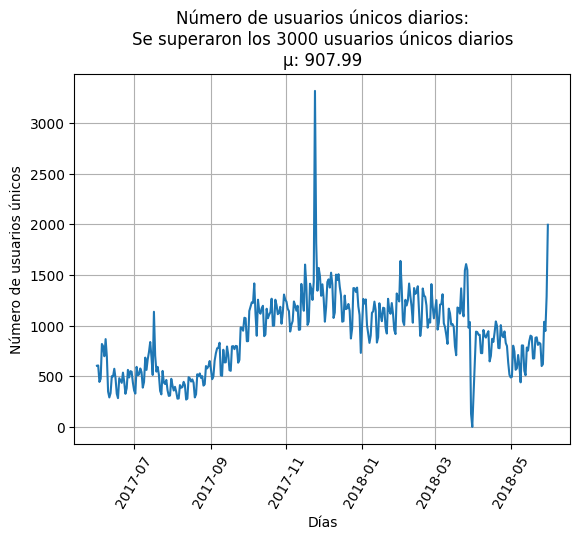

In [ ]:
#Se usa el método '.groupby()' para agrupar la información por día
#Se cuenta el número de usuarios únicos para cada día
vis_per_day=vis_cop.groupby('start_ts_day')['uid'].nunique()
#Se calcula el promedio de usuarios únicos diarios
dau=vis_per_day.mean()
#Se genera una gráfica
vis_per_day.plot(xlabel='Días', ylabel='Número de usuarios únicos', grid=True, rot=60,
                 title='Número de usuarios únicos diarios:\nSe superaron los 3000 usuarios únicos diarios\nµ: {:.2f}'.format(dau))

Al observar la gráfica podemos ver que durante los meses de Octubre 2017 a Abril de 2018 hubo una actividad de usuario estable donde ingresaban entre 1000 y 1500 usuarios únicos diarios. Hubieron registros que superaron los 3000 usuarios únicos diarios. Seguramente habían varios eventos interesantes en los últimos días del mes de Noviembre 2017.

##### Dispositivos: Número de usuarios diarios

Con la información disponible, podemos calcular el número de usuarios diarios únicos para cada dispositivo.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por día para cada dispositivo
#Se cuenta el número de usuarios únicos para cada día
vis_day_dev=vis_cop.pivot_table(index='start_ts_day', columns='device', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos diarios para cada dispositivo
vis_day_dev_m=vis_day_dev.mean(axis=0)
#Se muestran los promedios de usuarios únicos diarios para cada dispositivo
vis_day_dev_m

,0
device,
desktop,659.244505
touch,252.873278


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': "Número de usuarios únicos diarios para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'"}, xlabel='Días', ylabel='Número de usuarios únicos'>

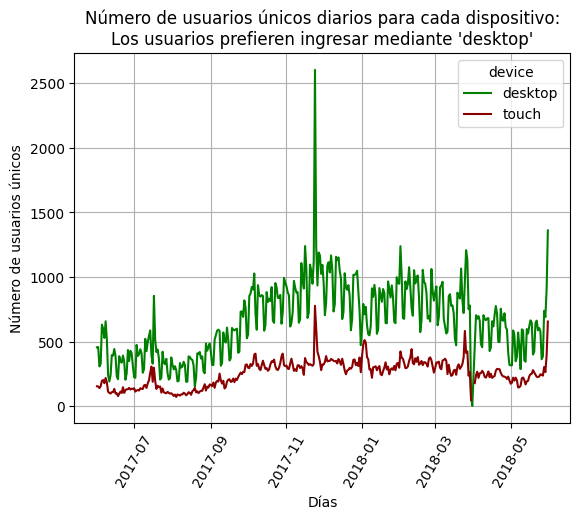

In [ ]:
#Se genera una gráfica
vis_day_dev.plot(xlabel='Días', ylabel='Número de usuarios únicos', grid=True, rot=60, color=['green','darkred'],
                 title="Número de usuarios únicos diarios para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'")

La actividad diaria de usuarios únicos para cada dispositivo sigue la tendencia general del análisis diario. Es posible apreciar que la mayor actividad de los usuarios se lleva a cabo desde los dispositivos 'desktop'. Nuevamente podemos apreciar un pico de actividad hacia los últimos días del mes de Noviembre de 2017.

##### Fuentes de anuncios: Número de usuarios diarios

Con la información disponible, podemos calcular el número de usuarios diarios únicos para cada fuente de anuncios. Antes de esto, vamos a determinar el número de usuarios únicos para cada fuente de anuncios.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información por fuente de anuncios
#Calculamos los usuarios únicos para cada fuente de anuncios
vis_cop.groupby('source_id')['uid'].nunique()

,uid
source_id,
1,18999
2,26245
3,74756
4,83525
5,56974
6,6
7,34
9,9264
10,8067


Podemos ver que la fuente de anuncios #6 no llega ni a los 10 usuarios. Su efecto podría ser despreciable en comparación con las otras fuentes de anuncios. Vamos a ver en más detalle los registros asociados a esta fuente de anuncios.

In [ ]:
#Filtramos el dataframe para ver en más detalle los registros de la fuente de anuncios #6
vis_cop.loc[vis_cop['source_id']==6]

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_day
16044,desktop,2017-12-28 01:09:00,6,2017-12-28 00:48:00,266932982800602818,2017,12,52,2017-12-28
74847,desktop,2017-07-01 18:32:00,6,2017-07-01 18:26:00,981265952898030128,2017,7,26,2017-07-01
91125,touch,2017-08-28 16:27:00,6,2017-08-28 16:24:00,14543303339731526429,2017,8,35,2017-08-28
208528,desktop,2017-11-12 00:28:00,6,2017-11-12 00:20:00,9535113879801312234,2017,11,45,2017-11-12
212023,desktop,2017-09-05 15:14:00,6,2017-09-05 15:14:00,15344267888517681108,2017,9,36,2017-09-05
270432,desktop,2018-01-16 22:49:00,6,2018-01-16 21:10:00,12223048503887313424,2018,1,3,2018-01-16


Podemos ver que la fuente de anuncios #6 generó 6 visitas en 6 meses diferentes. Continuemos con el análisis de la actividad diaria de los usuarios.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por día para cada fuente de anuncios
#Se cuenta el número de usuarios únicos para cada día
vis_day_source=vis_cop.pivot_table(index='start_ts_day', columns='source_id', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos diarios para cada fuente de anuncios
vis_day_source_m=vis_day_source.mean(axis=0)
#Se muestra el promedio de usuarios únicos diarios para cada dispositivo
vis_day_source_m

,0
source_id,
1,80.557692
2,120.707989
3,232.865014
4,275.454545
5,175.622590
6,1.000000
7,1.058824
9,36.110193
10,26.033058


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': 'Número de usuarios únicos diarios para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad diaria de los usuarios'}, xlabel='Días', ylabel='Número de usuarios únicos'>

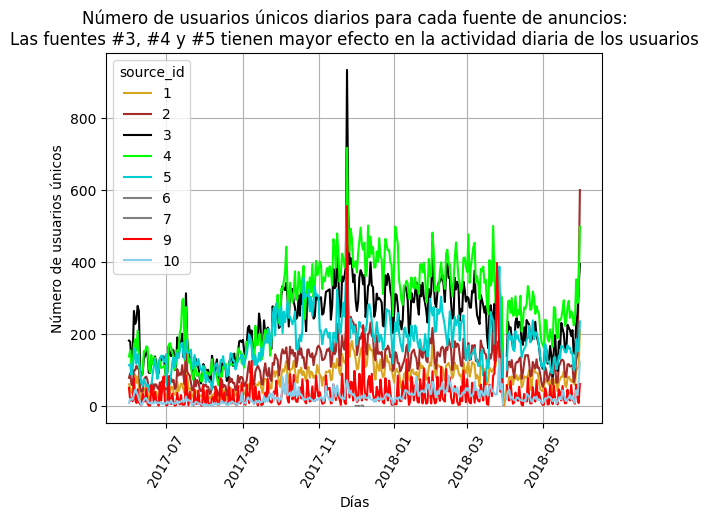

In [ ]:
#Se genera una gráfica
vis_day_source.plot(xlabel='Días', ylabel='Número de usuarios únicos', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','gray','gray','red','skyblue'],
                    title="Número de usuarios únicos diarios para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad diaria de los usuarios")

La actividad diaria de usuarios únicos para cada fuente de anuncios sigue la tendencia general del análisis diario. Las fuentes de anuncios con mayor cantidad de usuarios únicos diarios serían la #3, #4 y #5. La actividad generada por la fuente de anuncios #6 no es apreciable, y el efecto de la fuente de anuncios #7 apenas se puede notar en la parte inferior de la gráfica. Nuevamente podemos apreciar picos de actividad hacia los últimos días del mes de Noviembre de 2017.

#### Número de usuarios por semana

Vamos a determinar el número de usuarios únicos en cada semana y el promedio de usuarios semanal.

<Axes: title={'center': 'Número de usuarios únicos semanales:\nSe superaron los 10000 usuarios únicos semanales\nµ: 5716.25'}, xlabel='Semanas', ylabel='Número de usuarios únicos'>

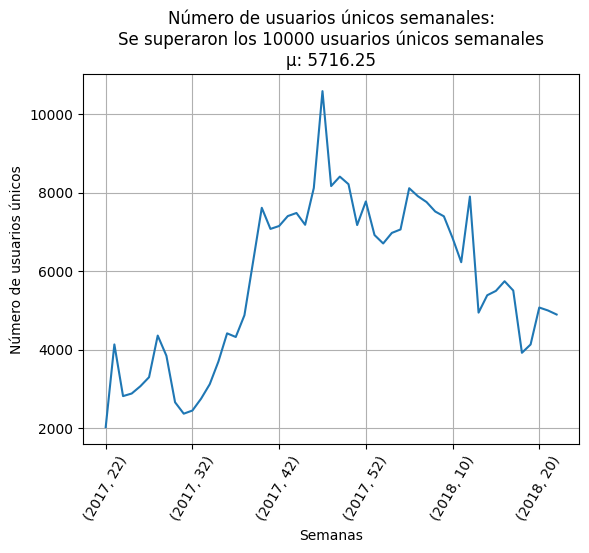

In [ ]:
#Se usa el método '.groupby()' para agrupar la información por año y semana
#Se cuenta el número de usuarios únicos para cada semana
vis_per_week=vis_cop.groupby(['start_ts_year','start_ts_week'])['uid'].nunique()
#Se calcula el promedio de usuarios únicos semanales
wau=vis_per_week.mean()
#Se genera una gráfica
vis_per_week.plot(xlabel='Semanas', ylabel='Número de usuarios únicos', grid=True, rot=60,
                 title='Número de usuarios únicos semanales:\nSe superaron los 10000 usuarios únicos semanales\nµ: {:.2f}'.format(wau))

Al observar la gráfica podemos ver que durante las semanas 42 del año 2017 a la semana 10 del año 2018 hubo una actividad de usuario estable donde ingresaban más de 6000 usuarios únicos semanales. Hubieron registros que superaron los 10000 usuarios únicos semanales. Seguramente habían varios eventos interesantes alrededor de la semana 47 del año 2017.

##### Dispositivos: Número de usuarios semanales

Con la información disponible, podemos calcular el número de usuarios semanales únicos para cada dispositivo.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por semana para cada dispositivo
#Se cuenta el número de usuarios únicos para cada semana
vis_wk_dev=vis_cop.pivot_table(index=['start_ts_year','start_ts_week'], columns='device', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos semanales para cada dispositivo
vis_wk_dev_m=vis_wk_dev.mean(axis=0)
#Se muestra el promedio de usarios únicos semanales para cada dispositivo
vis_wk_dev_m

,0
device,
desktop,4129.509434
touch,1634.924528


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': "Número de usuarios únicos semanales para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'"}, xlabel='Semanas', ylabel='Número de usuarios únicos'>

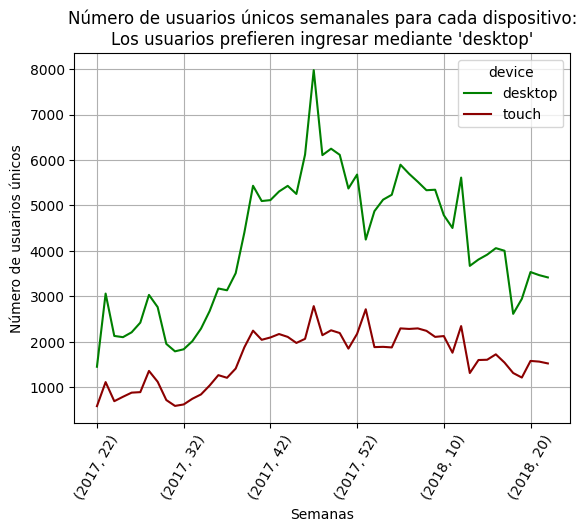

In [ ]:
#Se genera una gráfica
vis_wk_dev.plot(xlabel='Semanas', ylabel='Número de usuarios únicos', grid=True, rot=60, color=['green','darkred'],
                 title="Número de usuarios únicos semanales para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'")

La actividad semanal de usuarios únicos para cada dispositivo sigue la tendencia general del análisis semanal. Es posible apreciar que la mayor actividad de los usuarios se lleva a cabo desde los dispositivos 'desktop'. Nuevamente podemos apreciar un pico de actividad hacia la semana 47 del año 2017.

##### Fuentes de anuncios: Número de usuarios semanales

Con la información disponible, podemos calcular el número de usuarios semanales únicos para cada fuente de anuncios.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por semana para cada fuente de anuncios
#Se cuenta el número de usuarios únicos para cada semana
vis_wk_source=vis_cop.pivot_table(index=['start_ts_year','start_ts_week'], columns='source_id', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos semanales para cada fuente de anuncios
vis_wk_source_m=vis_wk_source.mean(axis=0)
#Se muestra el promedio de usarios únicos semanales para cada fuente de anuncios
vis_wk_source_m

,0
source_id,
1,463.490566
2,715.716981
3,1565.943396
4,1829.283019
5,1167.471698
6,1.000000
7,1.333333
9,238.698113
10,166.547170


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': 'Número de usuarios únicos semanales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad semanal de los usuarios'}, xlabel='Semanas', ylabel='Número de usuarios únicos'>

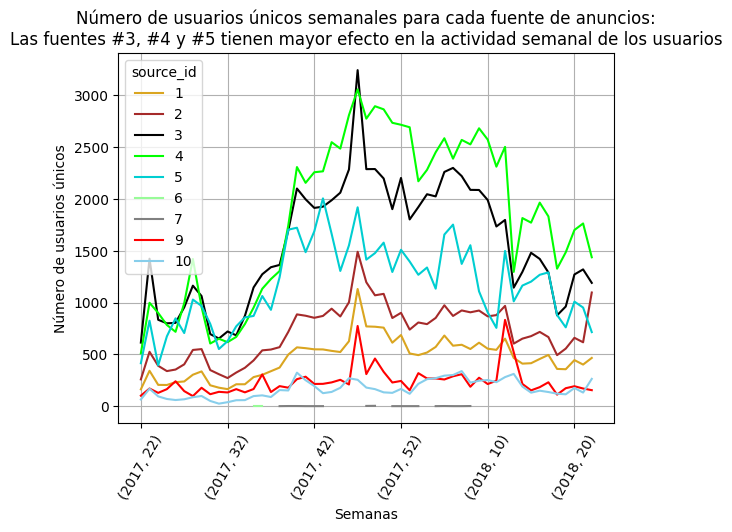

In [ ]:
#Se genera una gráfica
vis_wk_source.plot(xlabel='Semanas', ylabel='Número de usuarios únicos', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Número de usuarios únicos semanales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad semanal de los usuarios")

La actividad semanal de usuarios únicos para cada fuente de anuncios sigue la tendencia general del análisis semanal. Las fuentes de anuncios con mayor cantidad de usuarios únicos semanales serían la #3, #4 y #5. La actividad generada por las fuentes de anuncios #6 y #7 apenas se puede notar en la parte inferior de la gráfica. Nuevamente podemos apreciar picos de actividad hacia la semana 47 del año 2017.

#### Número de usuarios por mes

Vamos a determinar el número de usuarios en cada mes y el promedio de usuarios mensual.

<Axes: title={'center': 'Número de usuarios únicos mensuales:\nEn dos meses se superaron los 30000 usuarios únicos\nµ: 23228.42'}, xlabel='Meses', ylabel='Número de usuarios únicos'>

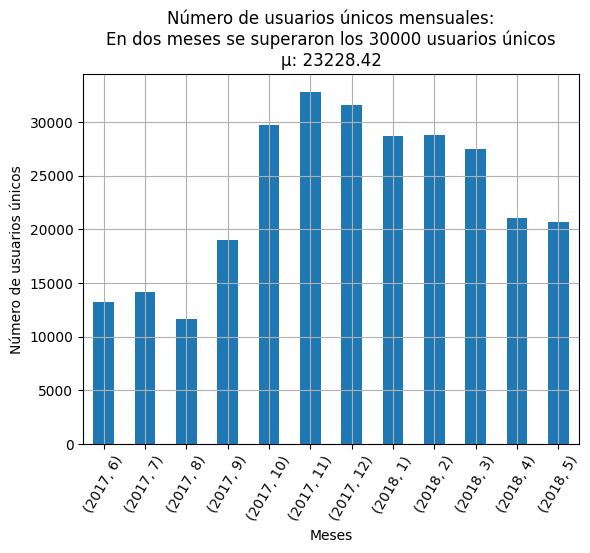

In [ ]:
#Se usa el método '.groupby()' para agrupar la información por mes
#Se cuenta el número de usuarios únicos para cada año y mes
vis_per_month=vis_cop.groupby(['start_ts_year','start_ts_month'])['uid'].nunique()
#Se calcula el promedio de usuarios únicos mensuales
mau=vis_per_month.mean()
#Se genera una gráfica
vis_per_month.plot(xlabel='Meses', ylabel='Número de usuarios únicos', grid=True, rot=60, kind='bar',
                 title='Número de usuarios únicos mensuales:\nEn dos meses se superaron los 30000 usuarios únicos\nµ: {:.2f}'.format(mau))

Al observar la gráfica podemos ver que durante los meses de Octubre 2017 a Marzo 2018 hubo una actividad de usuario estable donde ingresaban más de 25000 usuarios únicos mensuales. Hubieron  dos meses (Noviembre y Diciembre de 2017) en los cuáles se superaron los 30000 usuarios únicos. Seguramente habían varios eventos interesantes durante estos dos meses.

##### Dispositivos: Número de usuarios mensuales

Con la información disponible, podemos calcular el número de usuarios mensuales únicos para cada dispositivo.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por mes para cada dispositivo
#Se cuenta el número de usuarios únicos para cada mes
vis_mon_dev=vis_cop.pivot_table(index=['start_ts_year','start_ts_month'], columns='device', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos mensuales para cada dispositivo
vis_mon_dev_m=vis_mon_dev.mean(axis=0)
#Se muestra el promedio de usuarios únicos mensuales para cada dispositivo
vis_mon_dev_m

,0
device,
desktop,16724.916667
touch,6825.916667


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': "Número de usuarios únicos mensuales para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'"}, xlabel='Meses', ylabel='Número de usuarios únicos'>

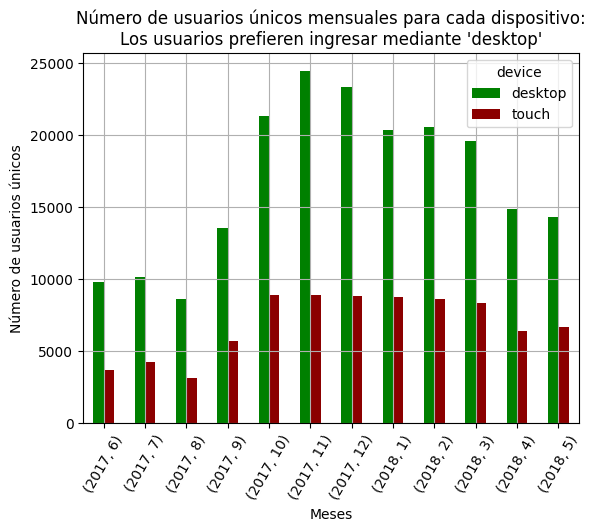

In [ ]:
#Se genera una gráfica
vis_mon_dev.plot(xlabel='Meses', ylabel='Número de usuarios únicos', grid=True, rot=60, color=['green','darkred'], kind='bar',
                 title="Número de usuarios únicos mensuales para cada dispositivo:\nLos usuarios prefieren ingresar mediante 'desktop'")

La actividad mensual de usuarios únicos para cada dispositivo sigue la tendencia general del análisis mensual. Es posible apreciar que la mayor actividad de los usuarios se lleva a cabo desde los dispositivos 'desktop'. Nuevamente podemos apreciar un pico de actividad en los meses de Noviembre y Diciembre de 2017.

##### Fuentes de anuncios: Número de usuarios mensuales

Con la información disponible, podemos calcular el número de usuarios mensuales únicos para cada fuente de anuncios.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por mes para cada fuente de anuncios
#Se cuenta el número de usuarios únicos para cada mes
vis_mon_source=vis_cop.pivot_table(index=['start_ts_year','start_ts_month'], columns='source_id', values='uid', aggfunc='nunique')
#Se calcula el promedio de usuarios únicos mensuales para cada fuente de anuncios
vis_mon_source_m=vis_mon_source.mean(axis=0)
#Se muestra el promedio de usuarios únicos mensuales para cada fuente de anuncios
vis_mon_source_m

,0
source_id,
1,1818.750000
2,2752.083333
3,6758.833333
4,7765.666667
5,5017.916667
6,1.000000
7,2.833333
9,987.000000
10,707.000000


Para apreciar la actividad con más detalle generamos una gráfica.

<Axes: title={'center': 'Número de usuarios únicos mensuales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad mensual de los usuarios'}, xlabel='Meses', ylabel='Número de usuarios únicos'>

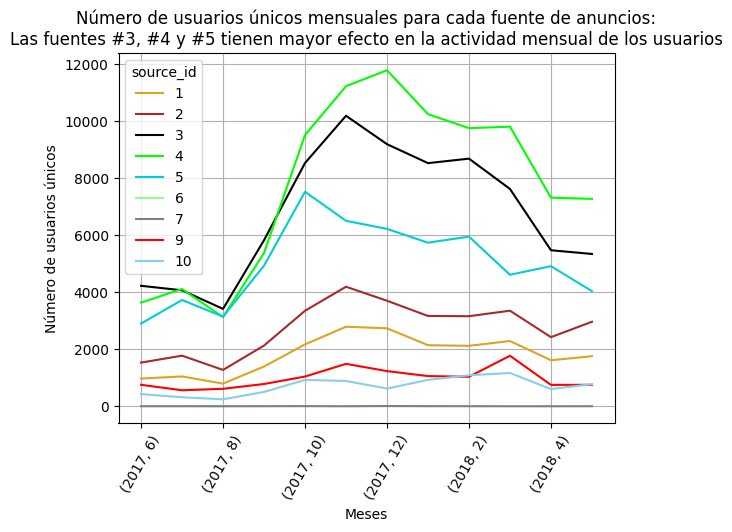

In [ ]:
#Se genera una gráfica
vis_mon_source.plot(xlabel='Meses', ylabel='Número de usuarios únicos', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Número de usuarios únicos mensuales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 tienen mayor efecto en la actividad mensual de los usuarios")

La actividad mensual de usuarios únicos para cada fuente de anuncios sigue la tendencia general del análisis mensual. Las fuentes de anuncios con mayor cantidad de usuarios únicos mensuales serían la #3, #4 y #5. La actividad generada por las fuentes de anuncios #6 y #7 apenas se puede notar en la parte inferior de la gráfica. Nuevamente podemos apreciar picos de actividad entre los meses de Octubre a Diciembre de 2017 para las fuentes de anuncios con mayor impacto.

#### Número de sesiones por día

Vamos a determinar el número de sesiones en cada día y el promedio de sesiones diarias.

<Axes: title={'center': 'Número de sesiones diarias:\nSe superaron las 4000 sesiones diarias\nµ: 987.36'}, xlabel='Días', ylabel='Número de sesiones'>

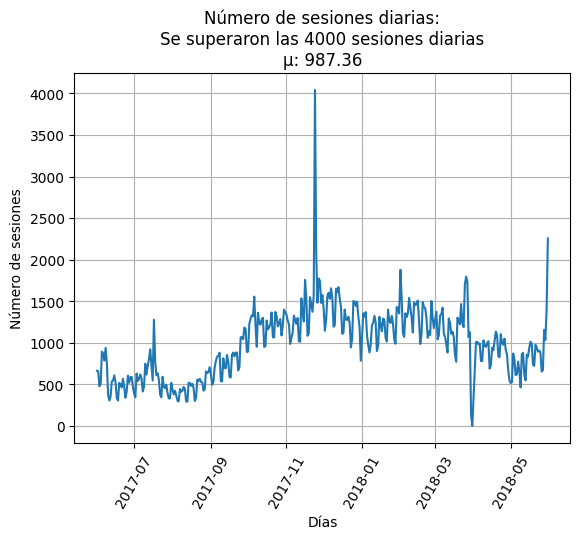

In [ ]:
#Se usa el método '.groupby()' para agrupar la información por día
#Se cuenta el número de sesiones para cada día
ses_per_day=vis_cop.groupby('start_ts_day')['uid'].count()
#Se calcula el promedio de sesiones diarias
ses_per_day_m=ses_per_day.mean()
#Se genera una gráfica
ses_per_day.plot(xlabel='Días', ylabel='Número de sesiones', grid=True, rot=60,
                 title='Número de sesiones diarias:\nSe superaron las 4000 sesiones diarias\nµ: {:.2f}'.format(ses_per_day_m))

Al observar la gráfica podemos ver que durante los meses de Octubre 2017 a Abril de 2018 hubo una actividad de usuario estable donde habían entre 1000 y 1500 inicios de sesión diarios. Hubieron registros que superaron los 3500 inicios de sesión diarios. Seguramente habían varios eventos interesantes en los últimos días del mes de Noviembre 2017.

##### Dispositivos: Número de sesiones por día

Con la información disponible, podemos calcular el número de inicios de sesión para cada dispositivo.

<Axes: title={'center': "Número de sesiones diarias para cada dispositivo:\nLos usuarios prefieren iniciar sesión desde 'desktop'"}, xlabel='Días', ylabel='Número de sesiones'>

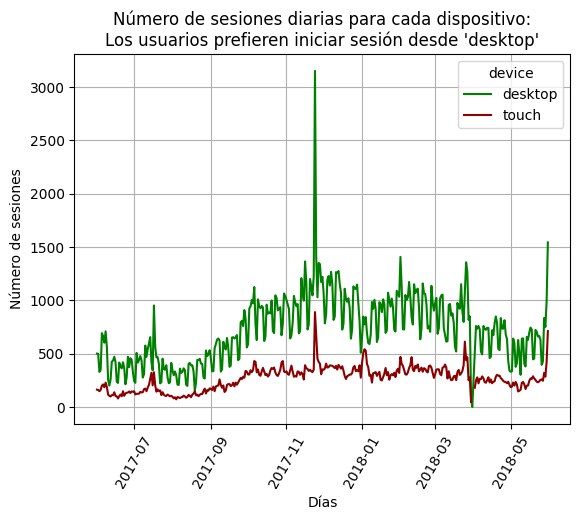

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por día para cada dispositivo
#Se cuenta el número de sesiones para cada día
vis_day_dev=vis_cop.pivot_table(index='start_ts_day', columns='device', values='uid', aggfunc='count')
#Se genera una gráfica
vis_day_dev.plot(xlabel='Días', ylabel='Número de sesiones', grid=True, rot=60, color=['green','darkred'],
                 title="Número de sesiones diarias para cada dispositivo:\nLos usuarios prefieren iniciar sesión desde 'desktop'")

La actividad diaria de sesiones para cada dispositivo sigue la tendencia general del análisis diario. Es posible apreciar que la mayor cantidad de inicios de sesión se lleva a cabo desde los dispositivos 'desktop'. Nuevamente podemos apreciar un pico de actividad en los últimos días del mes de Noviembre de 2017.

##### Fuentes de anuncios: Número de sesiones por día

Con la información disponible, podemos calcular el número de inicios de sesión para cada fuente de anuncios.

<Axes: title={'center': 'Número de sesiones diarias para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 generan mayor número de inicios de sesión'}, xlabel='Días', ylabel='Número de sesiones'>

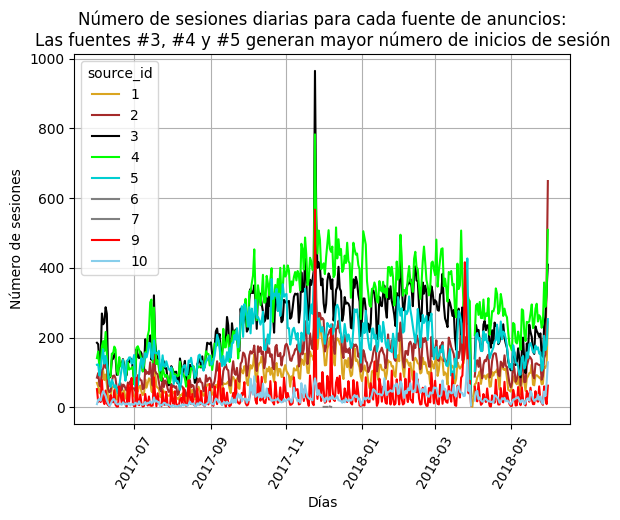

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por día para cada fuente de anuncios
#Se cuenta el número de sesiones para cada día
vis_day_source=vis_cop.pivot_table(index='start_ts_day', columns='source_id', values='uid', aggfunc='count')
#Se genera una gráfica
vis_day_source.plot(xlabel='Días', ylabel='Número de sesiones', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','gray','gray','red','skyblue'],
                    title="Número de sesiones diarias para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 generan mayor número de inicios de sesión")

La actividad diaria de sesiones para cada fuente de anuncios sigue la tendencia general del análisis diario. Las fuentes de anuncios con mayor cantidad de sesiones siguen siendo la #3, #4 y #5. Los inicios de sesión por efecto de la fuente de anuncios #6 no es apreciable, y el impacto de la fuente de anuncios #7 apenas se puede notar en la parte inferior de la gráfica. Nuevamente podemos apreciar picos de actividad en inicios de sesión en los últimos días del mes de Noviembre de 2017.

#### Duración de las sesiones

Ahora queremos conocer la duración de las sesiones de los usuarios.

<Axes: title={'center': 'Distribución de la duración de las sesiones:\nEn su mayoría, una sesión dura 60 segundos'}, xlabel='Duración de la sesión (segundos)', ylabel='Frecuencia'>

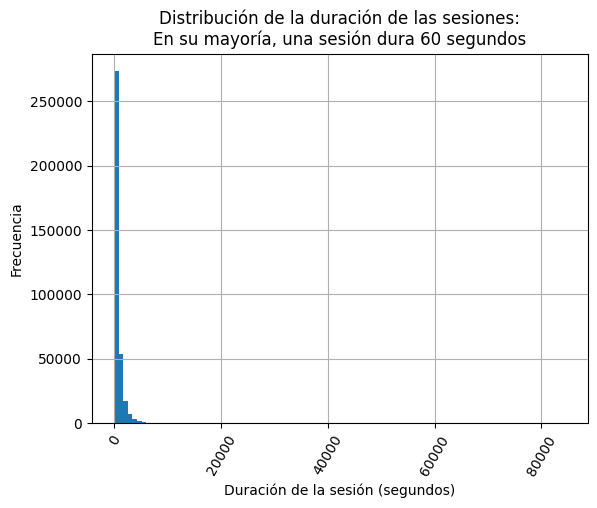

In [ ]:
#Creamos una columna con la duración de las sesiones en segundos
vis_cop['ses_dur']=(vis_cop['end_ts']-visits['start_ts']).dt.seconds
#Encontramos la estadística representativa
ses_dur_st=vis_cop['ses_dur'].mode()
#Generamos un histograma
vis_cop['ses_dur'].plot(xlabel='Duración de la sesión (segundos)', ylabel='Frecuencia', kind='hist', bins=100, grid=True, rot=60,
                      title='Distribución de la duración de las sesiones:\nEn su mayoría, una sesión dura {:.0f} segundos'.format(ses_dur_st[0]))

Dado que la distribución obtenida no es ni casi normal, el dato más representativo será la moda. Por lo tanto, podemos afirmar que en su mayoría las sesiones de los usuarios duran 60 segundos, es decir un minuto.

##### Dispositivo: Duración de las sesiones

Con la información disponible, podemos calcular la duración de las sesiones para cada dispositivo.

,ses_dur
device,
desktop,60
touch,60


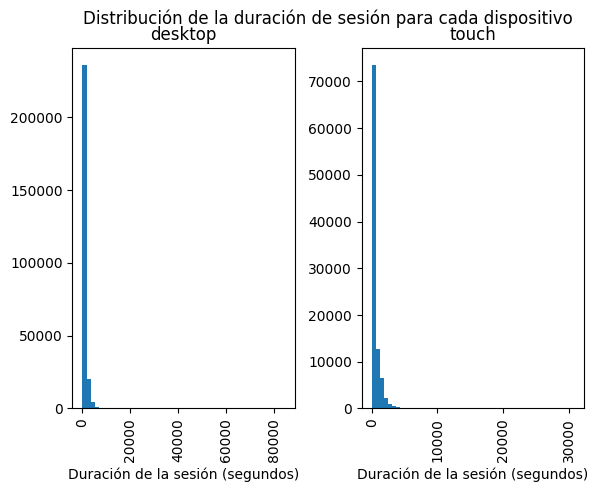

In [ ]:
#Generamos un histograma para cada dispositivo
hist_ds_dev=vis_cop.hist(column='ses_dur', by='device', bins=50, layout = (1, 2))
#Ciclo para definir el eje x en cada histograma
for ax in hist_ds_dev.flatten():
    ax.set_xlabel("Duración de la sesión (segundos)")
#Adición de título en la figura
plt.suptitle('Distribución de la duración de sesión para cada dispositivo')
#Encontramos la estadística representativa
ses_ds_dev_st=vis_cop.groupby('device')['ses_dur'].agg(pd.Series.mode)
#Mostramos la estadística representativa
ses_ds_dev_st

Nuevamente, las distribuciones obtenidas para los dispositivos no son casi normales, por lo que el dato más representativo será la moda. Por lo tanto, podemos afirmar que en su mayoría las sesiones de los usuarios desde cualquiera de los dos dispositivos duran 60 segundos, es decir un minuto.

##### Fuentes de anuncios: Duración de las sesiones

Con la información disponible, podemos calcular la duración de las sesiones para cada fuente de anuncios.

,ses_dur
source_id,
1,60
2,60
3,60
4,60
5,60
7,120
9,60
10,60


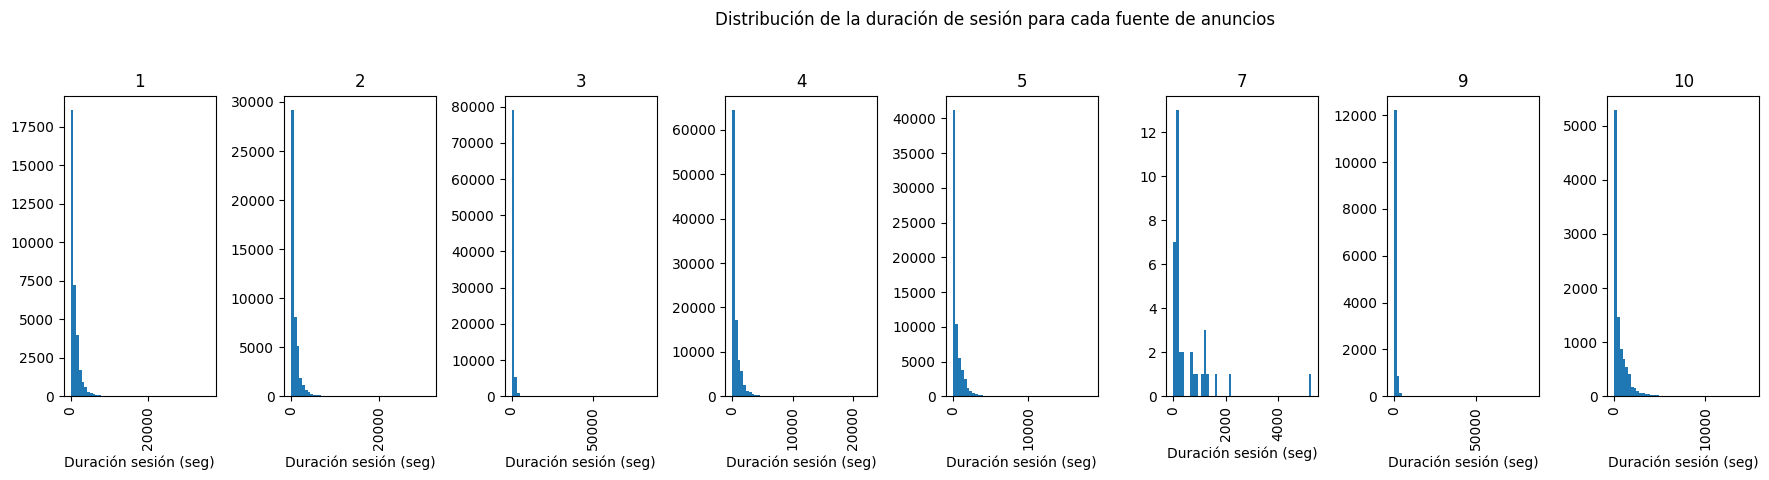

In [ ]:
#Excluimos la fuente anuncio #6
vis_wo_source_six=vis_cop[vis_cop['source_id']!=6]
#Generamos un histograma para cada dispositivo
hist_ds_source=vis_wo_source_six.hist(column='ses_dur', by='source_id', bins=50, layout = (1, 9), figsize=(20,5))
#Adición de título en la figura
plt.suptitle('Distribución de la duración de sesión para cada fuente de anuncios')
for ax in hist_ds_source.flatten():
    ax.set_xlabel("Duración sesión (seg)")
#Evitamos la superposición de los histogramas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#Encontramos la estadística representativa
ses_ds_source_st=vis_wo_source_six.groupby('source_id')['ses_dur'].agg(pd.Series.mode)
#Mostramos la estadística representativa
ses_ds_source_st

Dada la poca cantidad de registros para la fuente de anuncios #6, se excluye del análisis de duración de sesiones. Para el resto de fuentes de anuncios las distribuciones obtenidas no son casi normales, por lo que el dato más representativo será la moda. En general, las fuentes de anuncios están asociadas a sesiones que en su mayoría duran 60 segundos, es decir un minuto. La excepción es la fuente de anuncios #7, cuya moda es de 120 segundos, es decir 2 minutos.

#### Factor de adherencia (Sticky Factor)

Con los resultados anteriores podemos calcular los factores de adherencia.

In [ ]:
#Cálculo del sticky factor dau/wau
sf_dw=(dau/wau)*100
#Cálculo del sticky factor dau/mau
sf_dm=(dau/mau)*100
#Se muestran las métricas
print('Factor de adherencia [día/semana]: {:.2f}%\nFactor de adherencia [día/mes]: {:.2f}%'.format(sf_dw, sf_dm))

Factor de adherencia [día/semana]: 15.88%
Factor de adherencia [día/mes]: 3.91%


A partir de los resultados obtenidos podemos afirmar que cerca del 16% de los usuarios semanales se mantienen activos y alrededor del 4% de los usuarios mensuales se mantienen activos.

##### Dispositivos: Factor de adherencia

Con la información disponible, podemos calcular los factores de adherencia para cada dispositivo.

In [ ]:
#Agregamos las métricas calculadas en una lista
dev_dfs=[vis_day_dev_m, vis_wk_dev_m,vis_mon_dev_m]
#Mediante el método '.concat()' juntamos los dataframes en la lista
dev_concat_df=pd.concat(dev_dfs, axis='columns')
#Renombramos la columnas
dev_concat_df.columns=['dau', 'wau', 'mau']
#Calculamos el factor de adherencia dau/wau
dev_concat_df['d/w']=dev_concat_df['dau']/dev_concat_df['wau']*100
#Calculamos el factor de adherencia dau/mau
dev_concat_df['d/m']=dev_concat_df['dau']/dev_concat_df['mau']*100
#Presentamos el dataframe resultante
dev_concat_df

,dau,wau,mau,d/w,d/m
device,,,,,
desktop,659.244505,4129.509434,16724.916667,15.964233,3.941691
touch,252.873278,1634.924528,6825.916667,15.466970,3.704605


Para el caso de los dispostivos, sus factores de adherencia siguen la tendencia general. Cabe destacar que los factores del dispositivo 'desktop' son ligeramente superiores a los del dispositivo 'touch' a pesar de la diferencia entre la cantidad de usuarios asociada a cada uno.

##### Fuentes de anuncios: Factor de adherencia

Con la información disponible, podemos calcular los factores de adherencia para cada fuente de anuncios.

In [ ]:
#Agregamos las métricas calculadas en una lista
source_dfs=[vis_day_source_m, vis_wk_source_m, vis_mon_source_m]
#Mediante el método '.concat()' juntamos los dataframes en la lista
source_concat_df=pd.concat(source_dfs, axis='columns')
#Renombramos la columnas
source_concat_df.columns=['dau', 'wau', 'mau']
#Calculamos el factor de adherencia dau/wau
source_concat_df['d/w']=source_concat_df['dau']/source_concat_df['wau']*100
#Calculamos el factor de adherencia dau/mau
source_concat_df['d/m']=source_concat_df['dau']/source_concat_df['mau']*100
#Presentamos el dataframe resultante
source_concat_df

,dau,wau,mau,d/w,d/m
source_id,,,,,
1,80.557692,463.490566,1818.750000,17.380654,4.429289
2,120.707989,715.716981,2752.083333,16.865324,4.386059
3,232.865014,1565.943396,6758.833333,14.870589,3.445343
4,275.454545,1829.283019,7765.666667,15.058061,3.547082
5,175.622590,1167.471698,5017.916667,15.042985,3.499910
6,1.000000,1.000000,1.000000,100.000000,100.000000
7,1.058824,1.333333,2.833333,79.411765,37.370242
9,36.110193,238.698113,987.000000,15.127976,3.658581
10,26.033058,166.547170,707.000000,15.631042,3.682186


Para el caso de las fuentes de anuncios, dada la poca cantidad de usuarios asociados a las fuentes 6 y 7 decidimos excluirlas del análisis. Para el resto de fuentes de anuncios, sus factores de adherencia están dentro del orden de la tendencia general. Podemos destacar las fuentes de anuncios 1 y 2, cuyos factores superan el 16% y el 4% respectivamente.

### Pedidos

#### Tiempos de conversión

##### Fecha de registro

Antes de empezar con el análisis de pedidos, vamos a definir que la fecha de registro coincide con la fecha de la primera vez que el usuario inició sesión. Generamos un dataframe de visitas filtrado con la primera sesión de cada usuario.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información por id de usuario
#Luego encontramos la fecha de la primera sesión
registration_date=vis_cop.groupby('uid').agg({'start_ts':'min'})
#Renombramos el nombre de la columa para identificarla como la fecha de registro
registration_date.rename(columns={'start_ts':'reg_ts'}, inplace=True)
#Mediante el método '.join()' agregamos una columna con la información de la fecha de registro
vis_cop=vis_cop.join(registration_date, on='uid')
#Luego creamos un dataframe filtrado con los registros que coinciden con la fecha de registro
#Esto nos permite tener información de las fechas de registro, dispositivos y fuente de anuncios para cada usuario único
vis_cop_reg=vis_cop[['uid','reg_ts','source_id', 'device']][vis_cop['start_ts']==vis_cop['reg_ts']]
#Utilizamos el método '.sample()' para generar una muestra del dataframe
vis_cop_reg.sample(5)

,uid,reg_ts,source_id,device
266580,12142137037682656536,2017-06-12 18:18:00,3,desktop
128920,9295488424933952238,2017-12-05 16:29:00,4,touch
234513,13719046612332224938,2018-04-23 15:55:00,3,desktop
218956,1599678314546060210,2017-11-21 22:16:00,4,touch
179595,16134644050241298331,2017-12-20 18:34:00,3,desktop


##### Fecha de la primera compra

Ahora vamos a encontrar la fecha de la primera compra de cada usuario. Generamos un dataframe de pedidos filtrado con la primera compra de cada usuario.

In [ ]:
#Con el método '.copy()' generamos una copia del dataframe de pedidos
ord_cop=orders.copy()
#Mediante el método '.groupby()' agrupamos la información por usuario
#Luego encontramos la fecha de la primera compra
first_buy_date=ord_cop.groupby('uid').agg({'buy_ts':'min'})
#Renombramos el nombre de la columa para identificarla como la fecha de la primera compra
first_buy_date.rename(columns={'buy_ts':'first_buy_ts'}, inplace=True)
#Mediante el método '.join()' agregamos una columna con la información de la fecha de la primera compra
ord_cop=ord_cop.join(first_buy_date, on='uid')
#Luego creamos un dataframe filtrado con los registros que coinciden con la fecha de la primera compra
ord_cop_fb=ord_cop[ord_cop['buy_ts']==ord_cop['first_buy_ts']]
#Utilizamos el método '.sample()' para generar una muestra del dataframe
ord_cop_fb.sample(5)

,buy_ts,revenue,uid,first_buy_ts
36764,2018-02-24 17:38:00,1.34,7915698977916216074,2018-02-24 17:38:00
405,2017-06-05 13:52:00,4.89,11980886332529754681,2017-06-05 13:52:00
7591,2017-09-12 19:31:00,1.59,8171604112047725951,2017-09-12 19:31:00
40079,2018-03-16 09:27:00,6.72,1079308340344770390,2018-03-16 09:27:00
16861,2017-11-10 00:06:00,1.34,6338281418745449047,2017-11-10 00:06:00


Procedemos a juntar la información de los dataframes filtrados.

In [ ]:
#Mediante el método '.merge()' se unen los dos dataframes filtrados
ord_vis_mgd=pd.merge(ord_cop_fb,vis_cop_reg, on='uid')
#Utilizamos el método '.sample()' para generar una muestra del dataframe
ord_vis_mgd.sample(5)

,buy_ts,revenue,uid,first_buy_ts,reg_ts,source_id,device
12252,2017-11-01 08:53:00,2.81,11390753613856096370,2017-11-01 08:53:00,2017-11-01 08:46:00,5,desktop
23575,2018-01-28 19:16:00,6.11,2651152441988249260,2018-01-28 19:16:00,2018-01-28 11:09:00,4,desktop
3269,2017-07-18 14:35:00,4.89,10925655737090361004,2017-07-18 14:35:00,2017-07-18 14:35:00,1,desktop
20926,2018-01-02 22:30:00,2.14,8857838941477864384,2018-01-02 22:30:00,2018-01-02 22:27:00,4,desktop
2431,2017-07-08 14:49:00,0.92,13707997188311736050,2017-07-08 14:49:00,2017-07-08 14:33:00,1,desktop


##### Cálculo de los tiempos de conversión

Vamos a obtener los tiempos de conversión. Este tiempo será igual al número de días que pasaron desde el registro hasta la primera compra.

In [ ]:
#Extraemos el día de registro
ord_vis_mgd['reg_date']=ord_vis_mgd['reg_ts'].dt.date
#Extraemos el día de la primera compra
ord_vis_mgd['first_buy_date']=ord_vis_mgd['first_buy_ts'].dt.date
#Calculamos el tiempo de conversión en días
ord_vis_mgd['conv_time']=(ord_vis_mgd['first_buy_date']-ord_vis_mgd['reg_date'])/np.timedelta64(1, 'D')
#Encontramos la estadística representativa
conv_time_st=ord_vis_mgd['conv_time'].mode()
#Se muestra la estadística representativa
conv_time_st

,conv_time
0,0.0


Vamos a generar un histograma con la distribución de los tiempos de conversión.

<Axes: title={'center': 'Distribución de los tiempos de conversión:\nEn su mayoría, la primera compra se hace el mismo día del registro.'}, xlabel='Tiempos de conversión (días)', ylabel='Frecuencia'>

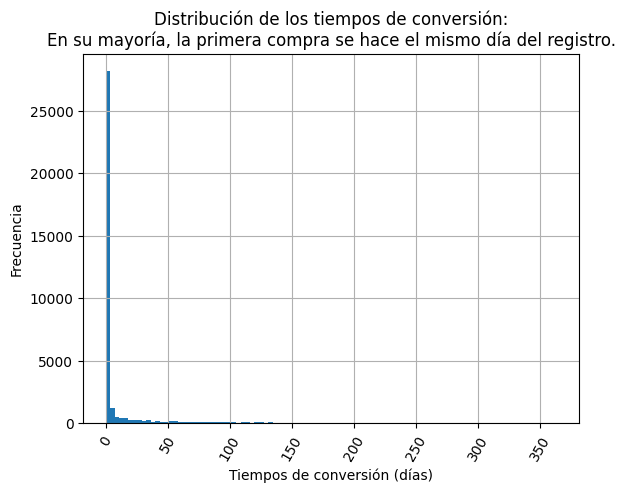

In [ ]:
#Condicional para el sub-título
if conv_time_st[0]==0:
  #Mensaje si la moda es igual a 0
  msg="En su mayoría, la primera compra se hace el mismo día del registro."
else:
  #Mensaje si la moda es diferente de 0
  msg="En su mayoría, la primera compra se hace {:.0f} días después del registro.".format(conv_time_st[0])
#Generamos un histograma
ord_vis_mgd['conv_time'].plot(xlabel='Tiempos de conversión (días)', ylabel='Frecuencia', kind='hist', bins=100, grid=True, rot=60,
                      title=f'Distribución de los tiempos de conversión:\n{msg}')

Dado que la distribución no es casi normal la estadística representativa será la moda. A partir de los resultados, podemos afirmar que la mayoría de los usuarios realizan su primera compra el mismo día que realizan el registro.

###### Dispositivos: Tiempos de conversión

Con la información disponible, podemos calcular los tiempos de conversión para cada dispositivo.

,conv_time
device,
desktop,0.0
touch,0.0


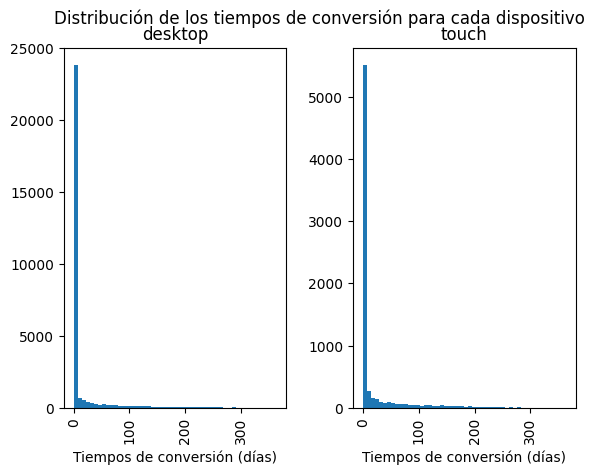

In [ ]:
#Generamos un histograma para cada dispositivo
hist_ct_dev=ord_vis_mgd.hist(column='conv_time', by='device', bins=50, layout = (1, 2))
#Ciclo para definir el eje x en cada histograma
for ax in hist_ct_dev.flatten():
    ax.set_xlabel("Tiempos de conversión (días)")
#Adición de título en la figura
plt.suptitle('Distribución de los tiempos de conversión para cada dispositivo')
#Encontramos la estadística representativa
ses_ct_dev_st=ord_vis_mgd.groupby('device')['conv_time'].agg(pd.Series.mode)
#Mostramos la estadística representativa
ses_ct_dev_st

Dado que las distribuciones no son casi normales la estadística representativa será la moda. A partir de los resultados, podemos afirmar que para tanto los usuarios que realizan el registro desde el dispositivo 'desktop' como desde el dispostivo 'touch', la mayoría de ellos realizan su primera compra el mismo día que se registran.

###### Fuentes de Anuncios: Tiempos de conversión

Con la información disponible, podemos calcular los tiempos de conversión para cada fuente de anuncios.

,conv_time
source_id,
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
7,0.0
9,0.0
10,0.0


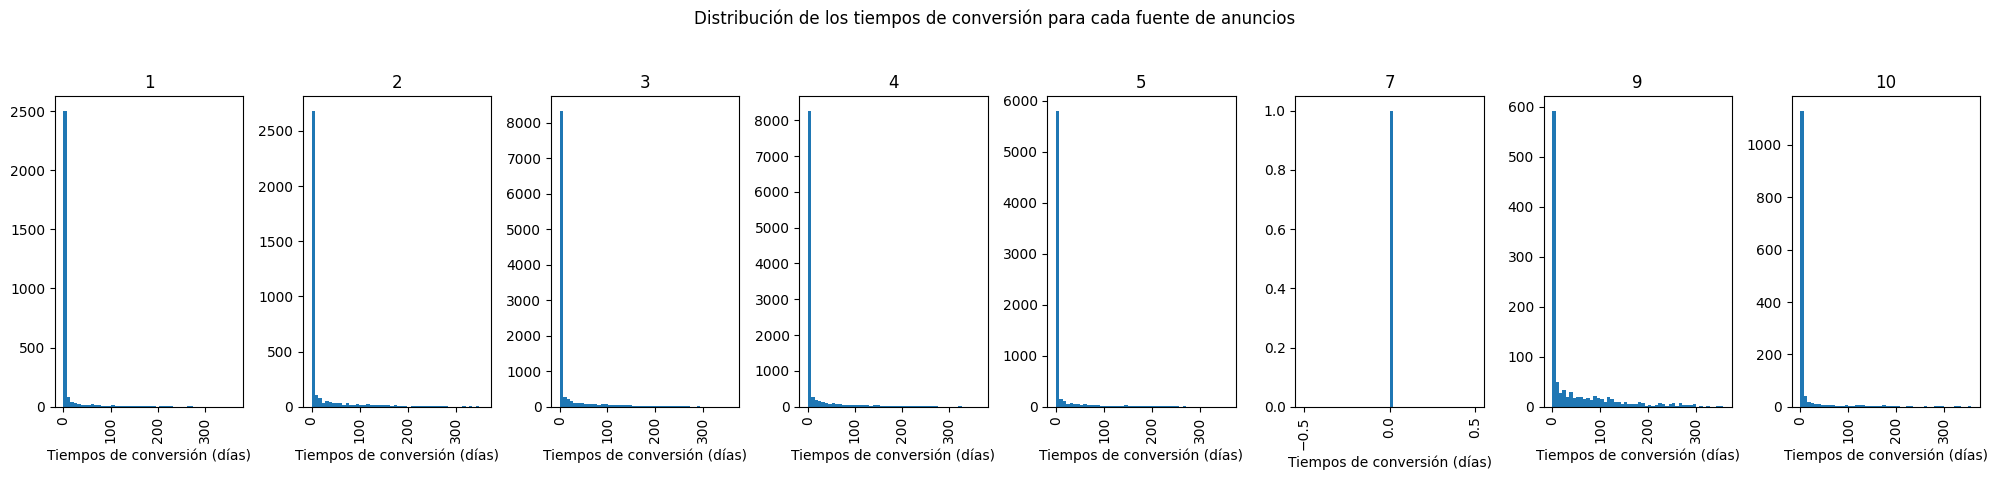

In [ ]:
#Generamos un histograma para cada fuente de anuncios
hist_ct_source=ord_vis_mgd.hist(column='conv_time', by='source_id', bins=50, layout = (1, 8), figsize=(20,5))
#Adición de título en la figura
plt.suptitle('Distribución de los tiempos de conversión para cada fuente de anuncios')
#Ciclo para definir el eje x en cada histograma
for ax in hist_ct_source.flatten():
    ax.set_xlabel("Tiempos de conversión (días)")
#Evitamos la superposición de los histogramas
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#Encontramos la estadística representativa
ses_ct_source_st=ord_vis_mgd.groupby('source_id')['conv_time'].agg(pd.Series.mode)
#Mostramos la estadística representativa
ses_ct_source_st

Dado que las distribuciones no son casi normales la estadística representativa será la moda. A partir de los resultados, podemos afirmar que para todas las fuentes de anuncios evaluadas, la mayoría de los usuarios realizan su primera compra el mismo día que realizan el registro.

##### Análisis de cohortes: Tiempos de conversión para los meses de registro

Ahora procederemos a realizar un análisis de cohortes de los tiempos de conversión. En este caso, definimos los cohortes como los meses en los que los usuarios realizaron su registro.

In [ ]:
#Extraemos el año y mes de registro
ord_vis_mgd['reg_month']=ord_vis_mgd['reg_ts'].dt.to_period('M')
#Filtramos el dataframe para obtener la información de cada cohorte para analizar
#el comportamiento en las 2 semanas posteriores al registro
ord_vis_mgd_filtered=ord_vis_mgd[ord_vis_mgd['conv_time']<=14]
#Se usa método '.groupby()' para agrupar los datos por cohorte y tiempos de conversión
#Se calcula el número de usuarios únicos que realizan su primera compra en las
#2 semanas posteriores al registro
#Se restablece el índice por defecto
orders_gb_cohorts=ord_vis_mgd_filtered.groupby(['reg_month', 'conv_time'])['uid'].nunique().reset_index()
#Se cambia el nombre de la columna
orders_gb_cohorts.rename(columns={'uid':'users'}, inplace=True)
#Se genera la tabla dinámica
orders_cohorts_pv=orders_gb_cohorts.pivot_table(index='reg_month', columns='conv_time', values='users')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
orders_cohorts_pv.fillna(0,inplace=True)
#Se muestra la tabla dinámica
orders_cohorts_pv

conv_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
reg_month,,,,,,,,,,,,,,,
2017-06,1716.0,121.0,36.0,29.0,32.0,13.0,18.0,13.0,14.0,6.0,6.0,5.0,4.0,9.0,8.0
2017-07,1465.0,101.0,36.0,30.0,17.0,20.0,15.0,13.0,11.0,11.0,4.0,6.0,6.0,6.0,7.0
2017-08,1059.0,54.0,21.0,11.0,14.0,11.0,9.0,9.0,7.0,6.0,4.0,4.0,3.0,9.0,4.0
2017-09,1879.0,138.0,42.0,35.0,29.0,38.0,23.0,36.0,14.0,12.0,12.0,14.0,7.0,13.0,11.0
2017-10,3140.0,239.0,84.0,54.0,42.0,39.0,39.0,23.0,30.0,13.0,16.0,12.0,18.0,19.0,12.0
2017-11,2706.0,250.0,96.0,60.0,59.0,38.0,32.0,31.0,25.0,23.0,23.0,28.0,16.0,23.0,26.0
2017-12,2831.0,234.0,92.0,50.0,59.0,43.0,29.0,26.0,30.0,16.0,16.0,11.0,8.0,14.0,12.0
2018-01,2187.0,191.0,74.0,43.0,28.0,28.0,29.0,19.0,27.0,11.0,16.0,12.0,8.0,2.0,14.0
2018-02,2360.0,184.0,70.0,56.0,44.0,31.0,20.0,25.0,24.0,27.0,11.0,9.0,8.0,8.0,10.0


Para facilitar la visualización de los resultados generamos un mapa de calor.

Text(0.5, 1.0, 'Tiempos de conversión (días) para cada cohorte mensual de registro:\nEl mes de Octubre 2017 tiene la mejor conversión en el tiempo 0 días')

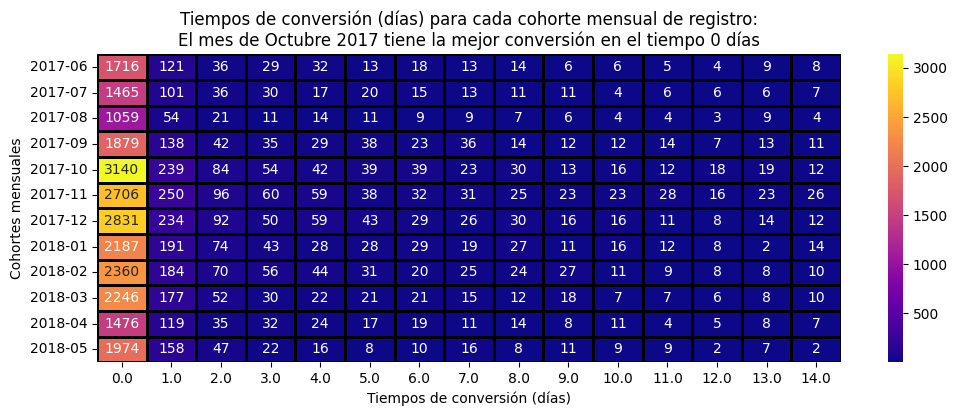

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(12, 4))
coh_cv_map=sns.heatmap(
    orders_cohorts_pv,
    cmap='plasma',
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black',
)
#Se define la etiqueta del eje x
coh_cv_map.set_xlabel('Tiempos de conversión (días)')
#Se define la etiqueta del eje y
coh_cv_map.set_ylabel('Cohortes mensuales')
#Se define el título del gráfico
coh_cv_map.set_title('Tiempos de conversión (días) para cada cohorte mensual de registro:\nEl mes de Octubre 2017 tiene la mejor conversión en el tiempo 0 días')

De las cohortes mensuales, aquella que presenta la mayor cantidad  de conversiones para el tiempo 0 días es la cohorte del mes de Octubre de 2017. En general para todos las cohortes la mayoría de sus usuarios realizan su primera compra el mismo día que se registran.

###### Tiempos de conversión para los dispositivos de los usuarios

Con la información disponible, podemos realizar un análsis de los tiempos de conversión para cada unos de los dispositivos.

In [ ]:
#Se usa el método '.groupby()' para agrupar los datos por dispositivo y tiempos de conversión
#Se calcula el número de usuarios únicos que realizan compras en las 2 semanas posteriores al registro
#Se restablece el índice por defecto
orders_gb_device=ord_vis_mgd_filtered.groupby(['device', 'conv_time'])['uid'].nunique().reset_index()
#Se cambia el nombre de la columa
orders_gb_device.rename(columns={'uid':'users'}, inplace=True)
#Se genera la tabla dinámica
orders_device_pv=orders_gb_device.pivot_table(index='device', columns='conv_time', values='users')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
orders_device_pv.fillna(0,inplace=True)
#Se muestra la tabla dinámica
orders_device_pv

conv_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
device,,,,,,,,,,,,,,,
desktop,20641.0,1469.0,487.0,330.0,289.0,228.0,200.0,184.0,152.0,114.0,100.0,80.0,61.0,94.0,95.0
touch,4398.0,497.0,198.0,122.0,97.0,79.0,64.0,53.0,64.0,48.0,35.0,41.0,30.0,32.0,28.0


Para facilitar la visualización de los resultados generamos un mapa de calor.

Text(0.5, 1.0, "Tiempos de conversión (días) para cada dispositivo:\nEl dispositivo 'desktop' tiene la mayor conversión en el tiempo 0 días")

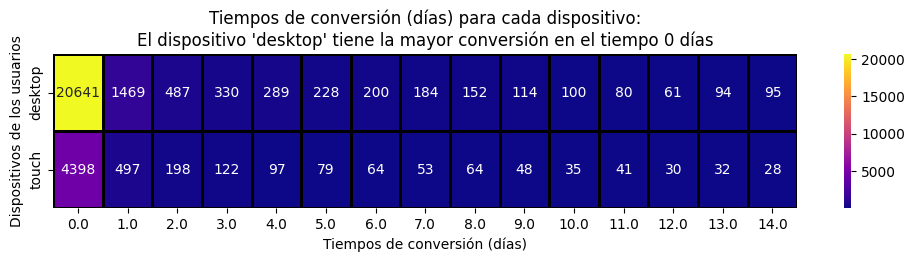

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(12, 2))
device_map=sns.heatmap(
    orders_device_pv,
    cmap='plasma',
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black'
)
#Se define la etiqueta del eje x
device_map.set_xlabel('Tiempos de conversión (días)')
#Se define la etiqueta del eje y
device_map.set_ylabel('Dispositivos de los usuarios')
#Se define el título del gráfico
device_map.set_title("Tiempos de conversión (días) para cada dispositivo:\nEl dispositivo 'desktop' tiene la mayor conversión en el tiempo 0 días")

Para el caso de los dispositivos las conversiones están dentro del orden de sus respectivos volúmnes de usuarios. Por lo tanto, esperabamos que el número de conversiones para el tiempo de 0 días del dispositivo 'desktop' fuera notablemente superior al número de conversiones del dispositivo 'touch'.

###### Tiempos de conversión para las fuentes de anuncios

Con la información disponible, podemos realizar un análsis de los tiempos de conversión para cada fuente de anuncios.

In [ ]:
#Se usa el método '.groupby()' para agrupar los datos por fuente de anuncios y tiempos de conversión
#Se calcula el número de usuarios únicos que realizan compras en las 2 semanas posteriores al registro
#Se restablece el índice por defecto
orders_gb_source=ord_vis_mgd_filtered.groupby(['source_id', 'conv_time'])['uid'].nunique().reset_index()
#Se cambia el nombre de la columna
orders_gb_source.rename(columns={'uid':'users'}, inplace=True)
#Se genera la tabla dinámica
orders_source_pv=orders_gb_source.pivot_table(index='source_id', columns='conv_time', values='users')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
orders_source_pv.fillna(0,inplace=True)
#Se muestra la tabla dinámica
orders_source_pv

conv_time,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
source_id,,,,,,,,,,,,,,,
1,2168.0,152.0,53.0,44.0,22.0,26.0,22.0,17.0,17.0,17.0,10.0,13.0,4.0,11.0,10.0
2,2244.0,218.0,54.0,52.0,44.0,24.0,24.0,24.0,23.0,25.0,15.0,10.0,8.0,18.0,8.0
3,7067.0,590.0,211.0,121.0,118.0,98.0,83.0,60.0,51.0,46.0,32.0,39.0,27.0,29.0,42.0
4,7026.0,556.0,202.0,140.0,112.0,89.0,77.0,66.0,62.0,34.0,44.0,35.0,30.0,41.0,30.0
5,5100.0,324.0,114.0,67.0,60.0,51.0,41.0,51.0,39.0,23.0,19.0,17.0,18.0,16.0,20.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,460.0,51.0,20.0,17.0,14.0,10.0,7.0,13.0,8.0,11.0,7.0,4.0,2.0,9.0,8.0
10,973.0,75.0,31.0,11.0,16.0,9.0,10.0,6.0,16.0,6.0,8.0,3.0,2.0,2.0,5.0


Para facilitar la visualización de los resultados generamos un mapa de calor.

Text(0.5, 1.0, 'Tiempos de conversión (días) para cada fuente de anuncios:\nLa fuentes #3 y #4 tienen las mayores conversiones en el tiempo 0 días')

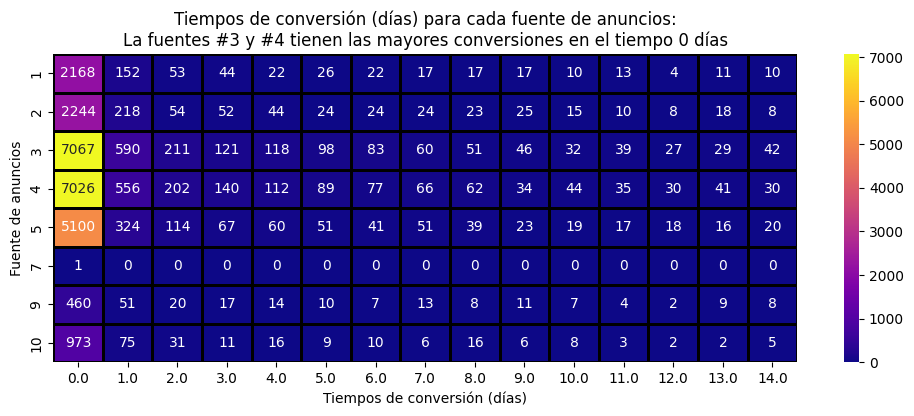

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(12, 4))
source_map=sns.heatmap(
    orders_source_pv,
    cmap='plasma',
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='black'
)
#Se define la etiqueta del eje x
source_map.set_xlabel('Tiempos de conversión (días)')
#Se define la etiqueta del eje y
source_map.set_ylabel('Fuente de anuncios')
#Se define el título del gráfico
source_map.set_title('Tiempos de conversión (días) para cada fuente de anuncios:\nLa fuentes #3 y #4 tienen las mayores conversiones en el tiempo 0 días')

De las fuentes de anuncios podemos afirmar sin dudas que las fuentes #3 y #4 presentan las mayores conversiones para el tiempo de 0 días. La fuente #5 también presenta un valor de conversión significativo para el tiempo 0 días. La fuente #6 no aparece dado que no genera ningún pedido. La fuente #7 solo logra una conversión en el período analizado.

#### Pedidos en períodos de tiempo

Para cada mes vamos a calcular el número de pedidos realizados.

In [ ]:
#Con el método '.to_period' extraemos el año y mes de la primera compra
ord_cop['first_buy_month']=ord_cop['first_buy_ts'].dt.to_period('M')
#Con el método '.to_period' extraemos el año y mes de las compras
ord_cop['buy_month']=ord_cop['buy_ts'].dt.to_period('M')
#Extraemos el año de las compras
ord_cop['buy_year']=ord_cop['buy_ts'].dt.year
#Extraemos el mes de las compras
ord_cop['buy_month_s']=ord_cop['buy_ts'].dt.month
#Mediante el método '.groupby()' agrupamos la información por mes de compra
#Calculamos el número de pedidos únicos, el número de usuarios únicos y el total de ingresos
#para cada mes de compras
buy_ord_month=ord_cop.groupby('buy_month').agg({'buy_ts':'nunique','uid':'nunique','revenue':'sum'})
#Renombramos las columas del dataframe resultante
buy_ord_month.columns=['n_orders','n_buyers','rev_monthly']
#Mostramos el dataframe agrupado
buy_ord_month

,n_orders,n_buyers,rev_monthly
buy_month,,,
2017-06,2245,2023,9557.49
2017-07,2236,1984,12539.47
2017-08,1737,1472,8758.78
2017-09,3188,2750,18345.51
2017-10,5136,4675,27987.70
2017-11,4964,4547,27069.93
2017-12,5604,4942,36388.60
2018-01,4369,3898,19417.13
2018-02,4746,4258,25560.54


Para tener una mejor visualización de los resultados generamos un gráfico
de barras.

<Axes: title={'center': 'Número de pedidos mensuales:\nEn los meses de Octubre y Diciembre de 2017\nse superan los 5000 pedidos al mes'}, xlabel='Meses', ylabel='Número de pedidos'>

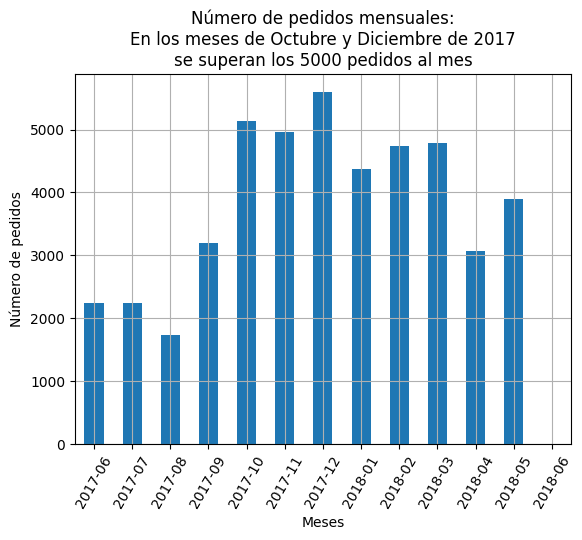

In [ ]:
#Se genera un gráfico de barras
buy_ord_month['n_orders'].plot(xlabel='Meses', ylabel='Número de pedidos',kind='bar', grid=True, rot=60,
                              title='Número de pedidos mensuales:\nEn los meses de Octubre y Diciembre de 2017\nse superan los 5000 pedidos al mes')

A partir del resultado obtenido, podemos afirmar que del mes Octubre 2017 al mes Marzo de 2018 se superan los 4000 pedidos mensuales. El mes con la mayor cantidad de pedidos fue Diciembre de 2017.

##### Dispositivos: Pedidos en períodos de tiempo

Con la información disponible, podemos calcular el número de pedidos mensuales para cada dispositivo. Para este caso, vamos a necesitar la información de los dispositivos que los usuarios usaron para realizar las compras.

In [ ]:
#Mediante el método '.merge()' se junta la información de los pedidos y visitas
#Para los usuarios que realizaron pedidos
vis_ord_mgd=ord_cop.merge(visits, on='uid', how='left')
#Vamos a filtrar el dataframe para obtener las compras asociadas a una fuente de anuncios
#Criterio usado: el tiempo de compra debe estar entre los tiempos de inicio y cierre de sesión
vis_ord_mgd['is_btw']=vis_ord_mgd['buy_ts'].between(vis_ord_mgd['start_ts'],vis_ord_mgd['end_ts'])
#Se obtiene el dataframe filtrado
vis_ord_filt=vis_ord_mgd[vis_ord_mgd['is_btw']]

Ahora procedemos a calcular el número de pedidos para cada dispositivo.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por mes para cada dispositivo
#Se cuenta el número de pedidos únicos para cada mes
ord_dev_month=vis_ord_filt.pivot_table(index='buy_month', columns='device', values='buy_ts', aggfunc='nunique')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
ord_dev_month.fillna(0, inplace=True)
#Se muestra la tabla dinámica
ord_dev_month

device,desktop,touch
buy_month,,
2017-06,1640.0,282.0
2017-07,1450.0,329.0
2017-08,1086.0,221.0
2017-09,1996.0,404.0
2017-10,3385.0,647.0
2017-11,3050.0,623.0
2017-12,3427.0,685.0
2018-01,2629.0,594.0
2018-02,2789.0,676.0


Para tener una mejor visualización de los resultados generamos un gráfico
de barras.

<Axes: title={'center': "Número de pedidos mensuales para cada dispositivo:\nLos usuarios prefieren comprar desde 'desktop'"}, xlabel='Meses', ylabel='Número de pedidos'>

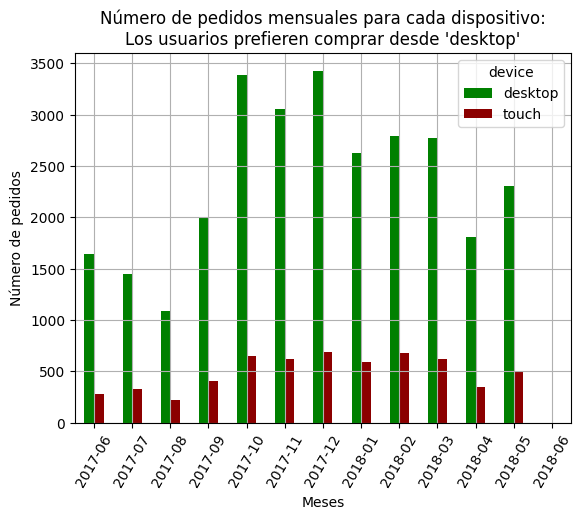

In [ ]:
#Se genera una gráfica
ord_dev_month.plot(xlabel='Meses', ylabel='Número de pedidos', grid=True, rot=60, color=['green','darkred'], kind='bar',
                              title="Número de pedidos mensuales para cada dispositivo:\nLos usuarios prefieren comprar desde 'desktop'")

A partir de los resultados obtenidos podemos afirmar que para todos los meses el número de pedidos realizados desde el dispositivo 'desktop' supera el valor de 1000. En el caso del dispostivo 'touch', en ningún mes se supera los 1000 pedidos.

##### Fuentes de anuncios: Pedidos en períodos de tiempo

Con la información disponible, podemos calcular el número de pedidos mensuales para cada fuente de anuncios.

In [ ]:
#Se usa el método '.pivot_table()' para agrupar la información por mes para cada fuente de anuncios
#Se cuenta el número de pedidos únicos para cada mes
ord_source_month=vis_ord_filt.pivot_table(index='buy_month', columns='source_id', values='buy_ts', aggfunc='nunique')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
ord_source_month.fillna(0, inplace=True)
#Se muestra la tabla dinámica
ord_source_month

source_id,1,2,3,4,5,7,9,10
buy_month,,,,,,,,
2017-06,267.0,250.0,542.0,367.0,402.0,0.0,51.0,89.0
2017-07,260.0,229.0,392.0,414.0,441.0,0.0,40.0,41.0
2017-08,181.0,150.0,273.0,300.0,342.0,1.0,46.0,38.0
2017-09,364.0,304.0,547.0,494.0,625.0,0.0,56.0,66.0
2017-10,549.0,539.0,873.0,999.0,962.0,0.0,96.0,180.0
2017-11,595.0,520.0,865.0,995.0,660.0,0.0,115.0,113.0
2017-12,678.0,600.0,958.0,1168.0,747.0,0.0,78.0,66.0
2018-01,468.0,412.0,740.0,892.0,634.0,0.0,72.0,78.0
2018-02,507.0,446.0,820.0,908.0,727.0,0.0,63.0,116.0


Para tener una mejor visualización de los resultados generamos un gráfico.

<Axes: title={'center': 'Número de pedidos mensuales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 generan más pedidos'}, xlabel='Meses', ylabel='Número de pedidos'>

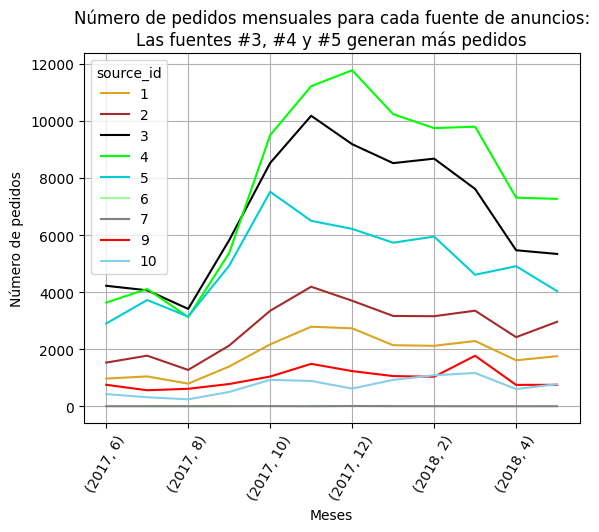

In [ ]:
#Se genera una gráfica
vis_mon_source.plot(xlabel='Meses', ylabel='Número de pedidos', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Número de pedidos mensuales para cada fuente de anuncios:\nLas fuentes #3, #4 y #5 generan más pedidos")

A partir de los resultados obtenidos podemos afirmar que las fuentes con la mayor cantidad de pedidos son las fuentes #3, #4 y #5. A partir del mes de Septiembre de 2017 el número de pedidos para estas tres fuentes es superior al valor de 4000.

#### Tamaño promedio de compra

Procederemos a calcular el tamaño promedio de compra para cada mes con la información obtenida anteriormente.

In [ ]:
#Se calcula el tamaño promedio de compra: ingresos dividido por el número de pedidos
buy_ord_month['avg_ord_val']=buy_ord_month['rev_monthly']/buy_ord_month['n_orders']

Para tener una mejor visualización de los resultados generamos un gráfico de barras.

<Axes: title={'center': 'Tamaño promedio de compra mensual:\nDiciembre de 2017 tiene el mayor tamaño promedio de compra'}, xlabel='Meses', ylabel='Tamaño promedio de compra  ($)'>

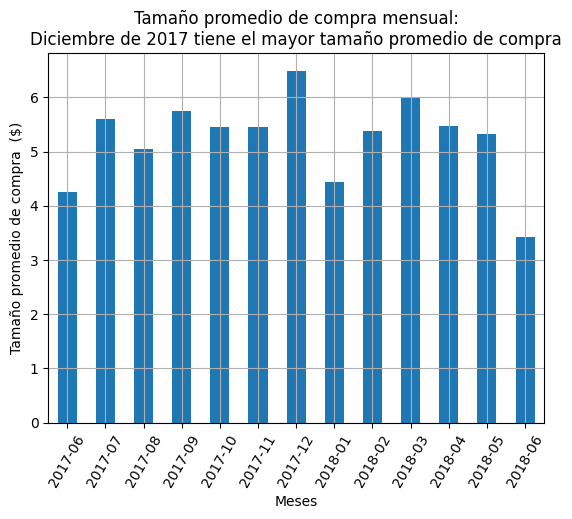

In [ ]:
#Se genera un gráfico de barras
buy_ord_month['avg_ord_val'].plot(xlabel='Meses', ylabel='Tamaño promedio de compra  ($)',kind='bar', grid=True, rot=60,
                              title='Tamaño promedio de compra mensual:\nDiciembre de 2017 tiene el mayor tamaño promedio de compra')

A partir de los resultados obtenidos, podemos afirmar que en la mayoría de los meses el tamaño promedio de compra es superior al valor de $5. El mes con el mayor tamaño promedio de compra es Diciembre de 2017.

##### Dispositivos: Tamaño promedio de compra

Con la información disponible, podemos calcular el tamaño promedio de compra mensual para cada dispositivo.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información por mes de compra y dispositivo
#Calculamos el número de pedidos únicos
num_ord_dev=vis_ord_filt.groupby(['buy_month','device'])['buy_ts'].nunique()
#Renombramos la columna resultante
num_ord_dev.name='n_orders'
#Mediante el método '.groupby()' agrupamos la información por mes de compra y dispositivo
#Calculamos el total de ingresos
rev_ord_dev=vis_ord_filt.groupby(['buy_month','device'])['revenue'].sum()
#Renombramos la columna resultante
rev_ord_dev.name='rev_monthly'
#Mediante el método '.concat()' juntamos los dataframes obtenidos
dev_ord_con=pd.concat([num_ord_dev,rev_ord_dev], axis='columns')
#Calculamos el tamaño promedio de compra
dev_ord_con['avg_val']=dev_ord_con['rev_monthly']/dev_ord_con['n_orders']
#Generamos una tabla dinámica
avg_val_dev=dev_ord_con.pivot_table(index='buy_month', columns='device', values='avg_val', aggfunc='mean')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
avg_val_dev.fillna(0, inplace=True)
#Se muestra la tabla dinámica
avg_val_dev

device,desktop,touch
buy_month,,
2017-06,4.234140,3.085000
2017-07,5.442917,4.545319
2017-08,4.887063,4.486290
2017-09,5.508567,3.746881
2017-10,4.938307,4.378068
2017-11,4.828961,4.827111
2017-12,6.026510,3.402569
2018-01,4.444397,3.121684
2018-02,4.871847,3.287678


Para tener una mejor visualización de los resultados generamos un gráfico
de barras.

<Axes: title={'center': "Tamaño promedio de compra mensual cada dispositivo:\n'desktop' tiene los mayores promedios"}, xlabel='Meses', ylabel='Tamaño promedio de compra ($)'>

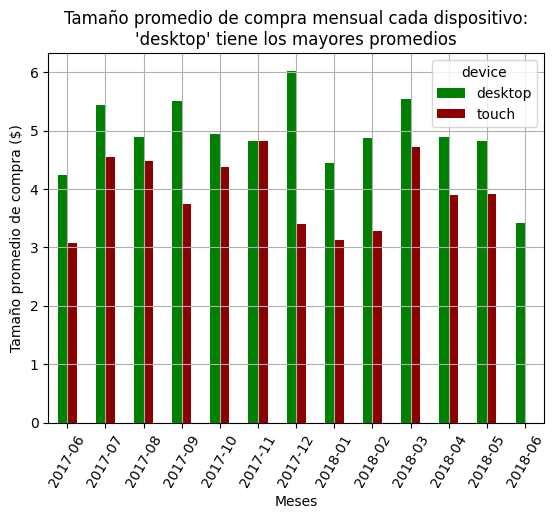

In [ ]:
#Se genera una gráfica
avg_val_dev.plot(xlabel='Meses', ylabel='Tamaño promedio de compra ($)', grid=True, rot=60, color=['green','darkred'], kind='bar',
                 title="Tamaño promedio de compra mensual cada dispositivo:\n'desktop' tiene los mayores promedios")

A partir de los resultados obtenidos, para casi todos los meses el tamaño promedio de compra para ambos dispositivos es superior a \$3. El dispositivo 'desktop' registra los mayores tamaños promedio de compra, llegando a superar el valor de \$5 en 4 meses diferentes.

##### Fuentes de anuncios: Tamaño promedio de compra

Con la información disponible, podemos calcular el tamaño promedio de compra mensual para cada fuente de anuncios.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información por año y mes de compra y fuente de anuncios
#Calculamos el número de pedidos únicos
num_ord_source=vis_ord_filt.groupby(['buy_year','buy_month_s','source_id'])['buy_ts'].nunique()
#Renombramos la columna resultante
num_ord_source.name='n_orders'
#Mediante el método '.groupby()' agrupamos la información por año y mes de compra y fuente de anuncios
#Calculamos el total de ingresos
rev_ord_source=vis_ord_filt.groupby(['buy_year','buy_month_s','source_id'])['revenue'].sum()
#Renombramos la columna resultante
rev_ord_source.name='rev_monthly'
#Mediante el método '.concat()' juntamos los dataframes obtenidos
source_ord_con=pd.concat([num_ord_source,rev_ord_source], axis='columns')
#Calculamos el tamaño promedio de compra
source_ord_con['avg_val']=source_ord_con['rev_monthly']/source_ord_con['n_orders']
#Generamos una tabla dinámica
avg_val_source=source_ord_con.pivot_table(index=['buy_year','buy_month_s'], columns='source_id', values='avg_val', aggfunc='mean')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
avg_val_source.fillna(0, inplace=True)
#Se muestra la tabla dinámica
avg_val_source

source_id                   1          2         3         4         5     7   \
buy_year buy_month_s                                                            
2017     6            4.734794   5.364560  3.096199  3.992234  4.357786  0.00   
         7            6.547231   6.016376  4.870714  5.025386  4.588549  0.00   
         8            5.536464   4.753933  4.776960  4.657967  4.618772  1.22   
         9            6.020659   5.764671  5.012651  3.766417  5.752736  0.00   
         10           5.387122   6.747755  3.886632  4.108999  4.907536  0.00   
         11           5.776403   5.442692  4.259329  4.205347  4.334758  0.00   
         12           4.768628  12.981233  3.886399  3.780317  4.520763  0.00   
2018     1            4.711047   6.273762  3.644595  3.520123  3.971388  0.00   
         2            4.577396   7.943408  3.653854  3.707885  4.176671  0.00   
         3            6.602889   8.382851  3.844322  4.394186  5.529699  0.00   
         4            6.531965   5.279614  3.747929  4.327468  4.347723  0.00   
         5            6.148376   6.601151  3.432376  3.760644  3.890321  0.00   
         6            0.000000   0.000000  0.000000  3.420000  0.000000  0.00   

source_id                   9         10  
buy_year buy_month_s                      
2017     6            2.712157  1.968427  
         7            4.556500  2.730976  
         8            2.653913  4.716053  
         9            4.175000  2.016212  
         10           3.126979  2.416944  
         11           3.015913  3.469469  
         12           3.212179  2.963636  
2018     1            2.279306  2.950256  
         2            4.222381  2.423966  
         3            2.566577  2.743333  
         4            7.103000  2.284632  
         5            3.997073  3.352190  
         6            0.000000  0.000000

Para tener una mejor visualización de los resultados generamos un gráfico.

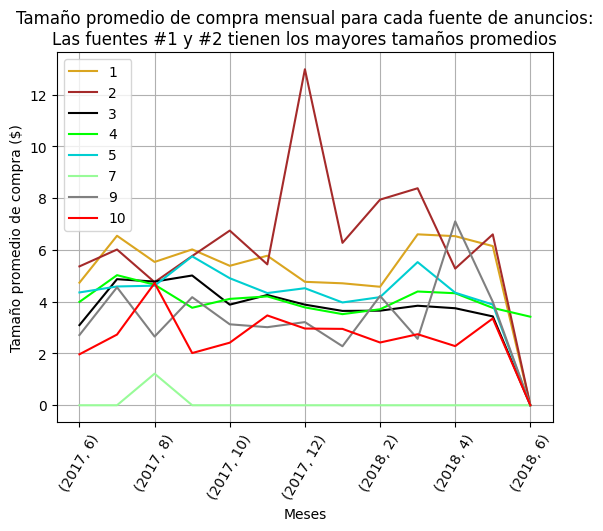

In [ ]:
#Se genera una gráfica
avg_val_source.plot(xlabel='Meses', ylabel='Tamaño promedio de compra ($)', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Tamaño promedio de compra mensual para cada fuente de anuncios:\nLas fuentes #1 y #2 tienen los mayores tamaños promedios")
plt.legend(loc='upper left')

A partir de los resultados obtenidos, podemos afirmar que las fuentes de anuncios con mayores tamaño promedio de compra a lo largo del período analizado son principalmente las fuentes #1 y #2.

#### Valor del ciclo de vida del usuario (LTV)

Ahora vamos a calcular el valor del ciclo de vida del cliente en un análisis de cohortes. En este caso, las cohortes corresponderán a los meses de la primera compra de cada usuario. Primero vamos a determinar los meses del ciclo de vida.

In [ ]:
#Mediante el método '.groupby' agrupamos la información por mes de la primera compra y el mes de compra
#Calculamos los ingresos totales y se establece el index por defecto
coh_rev=ord_cop.groupby(['first_buy_month','buy_month'])['revenue'].sum().reset_index()
#Mediante el método '.groupby' agrupamos la información por mes de la primera compra
#Calculamos el número de usuarios únicos y se establece el index por defecto
coh_buyers=ord_cop.groupby('first_buy_month')['uid'].nunique().reset_index()
#Asignamos un nuevo nombre a la columna
coh_buyers=coh_buyers.rename(columns={'uid':'n_buyers'})
#Mediante el método '.merge()' juntamos los dataframes obtenidos
coh_buyer_mgd=pd.merge(coh_buyers, coh_rev, on='first_buy_month')
#Calculamos los meses de ciclo de vida
coh_buyer_mgd['lf_time']=(coh_buyer_mgd['buy_month'].dt.year-coh_buyer_mgd['first_buy_month'].dt.year)*12+(coh_buyer_mgd['buy_month'].dt.month-coh_buyer_mgd['first_buy_month'].dt.month)
#Utilizamos el método '.sample()' para generar una muestra del dataframe
coh_buyer_mgd.sample(5)

,first_buy_month,n_buyers,buy_month,revenue,lf_time
70,2018-02,3651,2018-04,286.66,2
65,2018-01,3373,2018-03,1026.34,2
71,2018-02,3651,2018-05,270.70,3
37,2017-09,2581,2018-01,1033.84,4
48,2017-10,4340,2018-04,368.10,6


Ahora vamos a calcular el beneficio bruto y el valor del ciclo de vida del cliente. Se asume un margen del 50%.

In [ ]:
#Se asume un margen del 50%
marg_rt=0.5
#Se calcula el beneficio bruto
coh_buyer_mgd['gross_profit']=coh_buyer_mgd['revenue']*marg_rt
#Se calcula el 'ltv'
coh_buyer_mgd['ltv']=coh_buyer_mgd['gross_profit']/coh_buyer_mgd['n_buyers']
#Se genera una tabla dinámica
coh_buyer_mgd_pv=coh_buyer_mgd.pivot_table(index='first_buy_month', columns='lf_time', values='ltv', aggfunc='mean').round(2)
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
coh_buyer_mgd_pv.fillna(0, inplace=True)
#Se muestra la tabla dinámica
coh_buyer_mgd_pv

lf_time,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,2.36,0.24,0.22,0.48,0.51,0.37,0.48,0.29,0.28,0.30,0.29,0.13
2017-07,3.01,0.17,0.31,0.18,0.09,0.08,0.06,0.07,0.08,0.07,0.08,0.00
2017-08,2.64,0.24,0.23,0.20,0.25,0.14,0.11,0.20,0.15,0.09,0.00,0.00
2017-09,2.82,0.56,0.26,1.99,0.20,0.32,0.35,0.12,0.09,0.00,0.00,0.00
2017-10,2.50,0.27,0.10,0.08,0.08,0.06,0.04,0.06,0.00,0.00,0.00,0.00
2017-11,2.58,0.20,0.10,0.16,0.07,0.03,0.06,0.00,0.00,0.00,0.00,0.00
2017-12,2.37,0.13,0.46,0.53,0.16,0.17,0.00,0.00,0.00,0.00,0.00,0.00
2018-01,2.07,0.15,0.15,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02,2.08,0.14,0.04,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Para tener una mejor visualización, vamos a utilizar un mapa de calor para representar los resultados de la tabla dinámica.

Text(0.5, 1.0, 'Valor del ciclo de vida del usuario para las cohortes:\nLa cohorte de Septiembre de 2017 incrementa en el 4to mes')

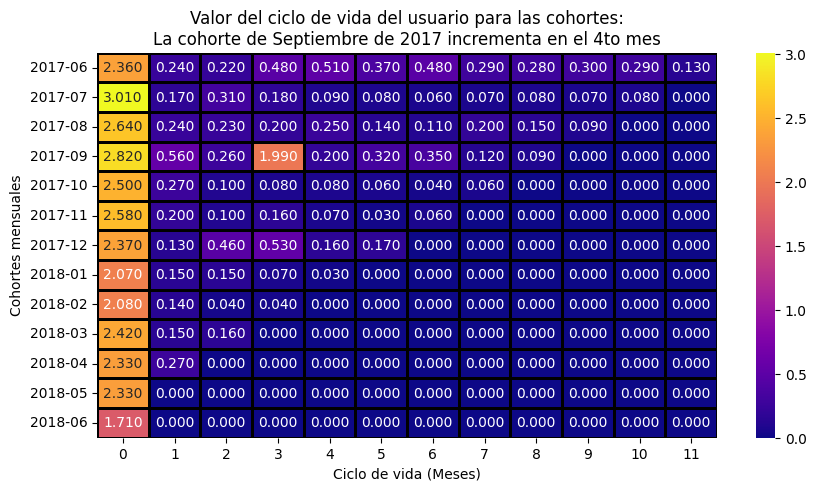

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(10, 5))
ltv_map=sns.heatmap(
    coh_buyer_mgd_pv,
    cmap='plasma',
    annot=True,
    fmt='.3f',
    linewidths=1,
    linecolor='black'
)
#Se define la etiqueta del eje x
ltv_map.set_xlabel('Ciclo de vida (Meses)')
#Se define la etiqueta del eje y
ltv_map.set_ylabel('Cohortes mensuales')
#Se define el título del gráfico
ltv_map.set_title("Valor del ciclo de vida del usuario para las cohortes:\nLa cohorte de Septiembre de 2017 incrementa en el 4to mes")

A partir del resultado obtenido, podemos afirmar que la cohorte con el mayor valor de ciclo de vida del cliente para el primer mes del ciclo de vida fue la cohorte de Julio de 2017. Teniendo en cuenta los incrementos de valor de ciclo de vida del cliente dentro de los meses del ciclo de vida, el más notorio se presentó en el cuarto mes de la cohorte de Septiembre de 2017 donde casi alcanza el valor de $2.

Procedemos a calcular el valor total para cada cohorte durante el ciclo de vida del usuario.

In [ ]:
#Mediante el método '.groupby()' se agrupa la información por cohorte
#Se calcula el ingreso de cada cohorte a lo largo del ciclo de vida
coh_ltv=coh_buyer_mgd.groupby('first_buy_month')['ltv'].sum()
#Se presenta el dataframe resultante
coh_ltv

,ltv
first_buy_month,
2017-06,5.939617
2017-07,4.193427
2017-08,4.235861
2017-09,6.717613
2017-10,3.180121
2017-11,3.197622
2017-12,3.819957
2018-01,2.470076
2018-02,2.293961


Para una mejor visualización de los datos generamos un gráfico de barras.


<Axes: title={'center': 'Valor de ciclo de vida del cliente en cada cohorte:\nEl cohorte de Septiembre-2017 tuvo el mayor\nvalor de ciclo de vida del cliente'}, xlabel='Cohorte mensual', ylabel='Valor del ciclo de vida del cliente ($)'>

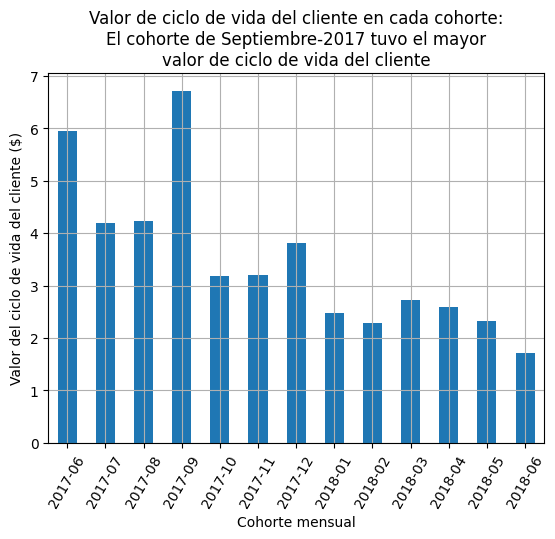

In [ ]:
#Se genera un gráfico de barras
coh_ltv.plot(xlabel='Cohorte mensual', ylabel='Valor del ciclo de vida del cliente ($)', kind='bar', grid=True, rot=60,
             title='Valor de ciclo de vida del cliente en cada cohorte:\nEl cohorte de Septiembre-2017 tuvo el mayor\nvalor de ciclo de vida del cliente')

Teniendo en cuenta los consolidados de los valores durante el ciclo de vida para cada una de las cohortes, las cohortes con los mayores valores de ciclo de vida del cliente son Septiembre de 2017 y Junio de 2017.

##### Dispositivos: LTV

Con la información disponible, podemos calcular el valor de ciclo de vida del ciente para cada dispostivo.

In [ ]:
#Mediante el método '.groupby()' se agrupa la información por mes de compra y dispositivo
#Se calcula el ingreso total
fbm_rev_dev=vis_ord_filt.groupby(['first_buy_month', 'device'])['revenue'].sum()
#Asignamos un nuevo nombre a la columna
fbm_rev_dev.name='rev_fb_month'
#Mediante el método '.groupby()' se agrupa la información por mes de primera compra y dispositivo
#Se calcula el numero de usuarios únicos
num_buy_dev=vis_ord_filt.groupby(['first_buy_month', 'device'])['uid'].nunique()
#Asignamos un nuevo nombre a la columna
num_buy_dev.name='n_buyers'
#Mediante el método '.concat()' juntamos los dataframes obtenidos
dev_ord_coh=pd.concat([fbm_rev_dev,num_buy_dev], axis='columns')
#Se calcula el beneficio bruto
dev_ord_coh['gross_profit']=dev_ord_coh['rev_fb_month']*marg_rt
#Se calcula el 'ltv'
dev_ord_coh['ltv']=dev_ord_coh['gross_profit']/dev_ord_coh['n_buyers']
#Se genera una tabla dinámica
dev_ord_ltv=dev_ord_coh.pivot_table(index='first_buy_month', columns='device', values='ltv', aggfunc='mean')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
dev_ord_ltv.fillna(0, inplace=True)
#Se muestra la tabla dinámica
dev_ord_ltv

device,desktop,touch
first_buy_month,,
2017-06,4.206560,1.701614
2017-07,3.540139,2.666182
2017-08,3.415494,2.472716
2017-09,5.024011,2.540213
2017-10,2.702797,2.450874
2017-11,2.599426,2.716451
2017-12,3.256542,1.804721
2018-01,2.300211,1.730452
2018-02,2.091449,1.819566


Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': "Valor del ciclo de vida del cliente en cada cohorte para cada dispositivo:\nEl valor del ciclo de vida del cliente es mayor para 'desktop'"}, xlabel='Cohorte mensual', ylabel='Valor del ciclo vida del cliente ($)'>

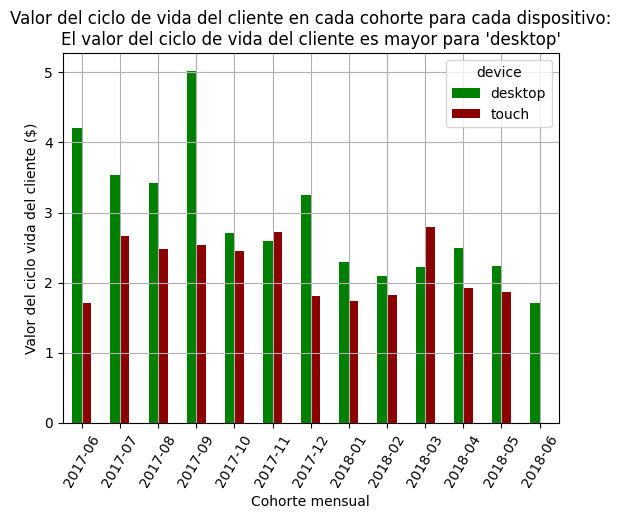

In [ ]:
#Se genera una gráfica
dev_ord_ltv.plot(xlabel='Cohorte mensual', ylabel='Valor del ciclo vida del cliente ($)', grid=True, rot=60, color=['green','darkred'], kind='bar',
                 title="Valor del ciclo de vida del cliente en cada cohorte para cada dispositivo:\nEl valor del ciclo de vida del cliente es mayor para 'desktop'")

Teniendo en cuenta los resultados obtenidos, el valor de ciclo de vida del cliente para el dispositivo 'desktop' solo es notablemente superior al del dispositivo 'touch' durante las primeras 4 cohortes mensuales, período desde el mes de Junio de 2017 al mes de Septiembre de 2017, y en la cohorte de Diciembre de 2017. El dispositivo 'desktop' alcanza un máximo de valor de ciclo de vida del cliente en la cohorte de Septiembre de 2017 con un valor superior a $5.

##### Fuentes de anuncios: LTV

Con la información disponible, podemos calcular el valor de ciclo de vida del ciente para cada fuente de anuncios.

In [ ]:
#Mediante el método '.groupby()' se agrupa la información por mes de la primera compra
#y fuente de anuncios. Se calcula el numero de usuarios únicos
num_buy_source=vis_ord_filt.groupby(['first_buy_month', 'source_id'])['uid'].nunique()
#Asignamos un nuevo nombre a la columna
num_buy_source.name='n_buyers'
#Mediante el método '.groupby()' se agrupa la información por mes de la primera compra,
#mes de compra y fuente de anuncios. Se calcula el ingreso total
fbm_rev_source=vis_ord_filt.groupby(['first_buy_month', 'source_id','buy_month'])['revenue'].sum()
#Asignamos un nuevo nombre a la columna
fbm_rev_source.name='rev_fb_month'
#Restablecemos el index por defecto
fbm_rev_source=fbm_rev_source.reset_index()
#Asignamos como index las columnas mes de la primera de compra y fuente de anuncio
fbm_rev_source=fbm_rev_source.set_index(['first_buy_month','source_id'])
#Mediante el método '.join()' agregamos la serie al dataframe
#Restablecemos el index por defecto
source_ord_coh=fbm_rev_source.join(num_buy_source, how='left').reset_index()
#Extraemos el año de la primera compra
source_ord_coh['fb_year']=source_ord_coh['first_buy_month'].dt.year
#Extraemos el mes de la primera compra
source_ord_coh['fb_month']=source_ord_coh['first_buy_month'].dt.month
#Calculamos los meses del ciclo de vida del usuario
source_ord_coh['lf_time']=(source_ord_coh['buy_month'].dt.year-source_ord_coh['first_buy_month'].dt.year)*12+(source_ord_coh['buy_month'].dt.month-source_ord_coh['first_buy_month'].dt.month)
#Asignamos como index las columnas primer de compra y fuente de anuncio
source_ord_coh=source_ord_coh.set_index(['first_buy_month','source_id'])
#Calculamos el beneficio bruto
source_ord_coh['gross_profit']=source_ord_coh['rev_fb_month']*marg_rt
#Calculamos el 'ltv'
source_ord_coh['ltv']=source_ord_coh['gross_profit']/source_ord_coh['n_buyers']
#Se genera una tabla dinámica
source_ord_ltv=source_ord_coh.pivot_table(index=['fb_year','fb_month'], columns='source_id', values='ltv', aggfunc='sum')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
source_ord_ltv.fillna(0, inplace=True)
#Se muestra la tabla dinámica
source_ord_ltv

source_id               1          2         3         4         5     7   \
fb_year fb_month                                                            
2017    6         6.293218   5.308853  1.646635  2.411675  4.090699  0.00   
        7         4.979676   3.700602  2.754635  2.710839  2.569287  0.00   
        8         4.247143   3.031934  2.422413  2.474884  3.299104  0.61   
        9         4.397273  13.952543  2.652513  2.067329  3.046460  0.00   
        10        2.991958   3.652903  2.010107  2.174728  2.624384  0.00   
        11        3.131930   2.939787  2.153946  2.194264  2.293117  0.00   
        12        2.125263   7.737838  1.898297  1.939242  3.289970  0.00   
2018    1         2.998611   2.430935  1.819581  1.867605  2.080112  0.00   
        2         2.237082   2.205361  1.858794  1.855138  2.027998  0.00   
        3         2.858990   2.871372  1.884445  2.184246  2.222611  0.00   
        4         3.439039   2.553568  1.842361  2.197554  2.254221  0.00   
        5         2.474371   3.259185  1.613521  1.900553  1.979769  0.00   
        6         0.000000   0.000000  0.000000  1.710000  0.000000  0.00   

source_id               9         10  
fb_year fb_month                      
2017    6         2.438361  1.011348  
        7         2.458529  1.367907  
        8         2.097273  2.539744  
        9         1.674077  0.938043  
        10        1.653544  1.242781  
        11        1.618608  1.942330  
        12        1.921875  1.601825  
2018    1         1.201604  1.472658  
        2         2.224722  1.195826  
        3         1.111636  1.436667  
        4         2.990000  1.239489  
        5         1.960484  1.749362  
        6         0.000000  0.000000

Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': 'Valor del ciclo de vida de cada cohorte para cada fuente de anuncios:\nEl valor de ciclo de vida del cliente es mayor para las fuentes de anuncios #1 y #2'}, xlabel='Cohorte mensual', ylabel='Valor del ciclo vida del cliente ($)'>

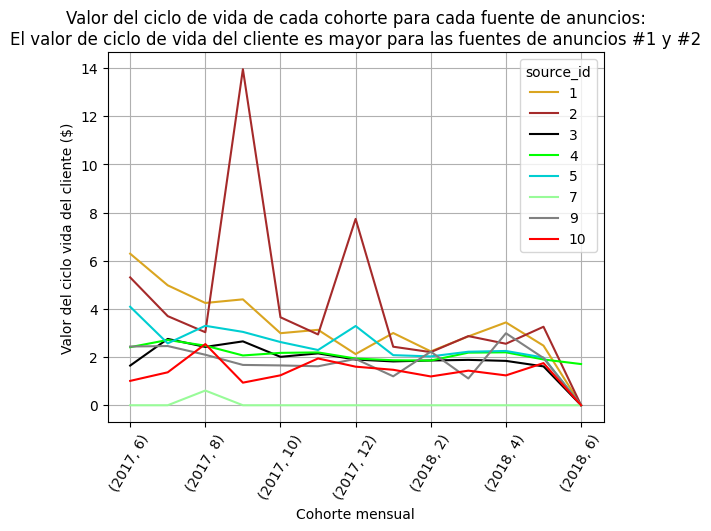

In [ ]:
#Se genera una gráfica
source_ord_ltv.plot(xlabel='Cohorte mensual', ylabel='Valor del ciclo vida del cliente ($)', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Valor del ciclo de vida de cada cohorte para cada fuente de anuncios:\nEl valor de ciclo de vida del cliente es mayor para las fuentes de anuncios #1 y #2")

Para el caso de las fuentes de anuncios, vuelven a destacar las fuentes de anuncios #1 y #2. Particularmente, la fuente de anuncios #2 presenta dos picos notables. El primero durante la cohorte de Septiembre de 2017 donde alcanza el máximo valor de ciclo vida del cliente de \$14. El segundo lo logra en la cohorte de Dicimebre de 2017 donde se acerca a un valor de ciclo de vida del cliente de \$8.  

### Costos de Marketing

#### Inversión

##### Inversión total

Vamos a calcular la inversión total realizada en marketing.

In [ ]:
#Con el método '.copy()' generamos una copia del dataframe de costos de marketing
mark_cost_cop=mark_cost.copy()
#Calculamos los costos totales de marketing
total_mark_cost=mark_cost_cop['costs'].sum()
#Presentamos el valor
print('Inversión total en marketing: ${:.2f}'.format(total_mark_cost))

Inversión total en marketing: $329131.62


Durante el tiempo analizado se invirtieron $329131.62 en marketing.

##### Inversión por fuente de anuncios

Ahora vamos a determinar la cantidad de dinero invertida en cada una de las fuentes de anuncios.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información por fuente de anuncios
#Calculamos los costos de marketing para cada fuente
mark_cost_source=mark_cost_cop.groupby('source_id')['costs'].sum()
#Se muestra la inversión en cada una de las fuentes de anuncios
mark_cost_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': 'Costos de marketing para cada fuente de anuncios\nSe invirtió la mayor cantidad de dinero en la fuente #3'}, xlabel='Fuente de anuncios', ylabel='Inversión ($)'>

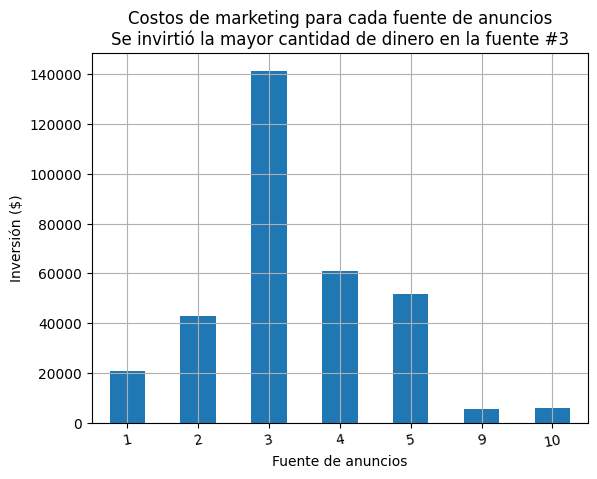

In [ ]:
#Generamos un gráfico de barras
mark_cost_source.plot(xlabel='Fuente de anuncios', ylabel='Inversión ($)', kind='bar', grid=True, rot=10,
                      title='Costos de marketing para cada fuente de anuncios\nSe invirtió la mayor cantidad de dinero en la fuente #3')

A partir de los resultados obtenidos, podemos ver que una gran parte del presupuesto se invierte en la fuente de anuncios #3. De hecho, el valor invertido es más del doble de la cantidad de la segunda fuente de anuncios con mayor inversión.

##### Inversión mensual

Procedemos a calcular la cantidad invertida en marketing en cada mes.

In [ ]:
#Extraemos el mes de la fecha de inversión
mark_cost_cop['date_month']=mark_cost_cop['date'].dt.to_period('M')
#Mediante el método '.groupby()' agrupamos la información para cada mes de inversión
mark_cost_month=mark_cost_cop.groupby('date_month')['costs'].sum()
#Se presenta la inversión mensual
mark_cost_month

,costs
date_month,
2017-06,18015.00
2017-07,18240.59
2017-08,14790.54
2017-09,24368.91
2017-10,36322.88
2017-11,37907.88
2017-12,38315.35
2018-01,33518.52
2018-02,32723.03


Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': 'Costos de marketing mensuales:\nInversiones superiores a los 35000 durante los\nmeses de Octubre a Diciembre de 2017'}, xlabel='Meses', ylabel='Inversión ($)'>

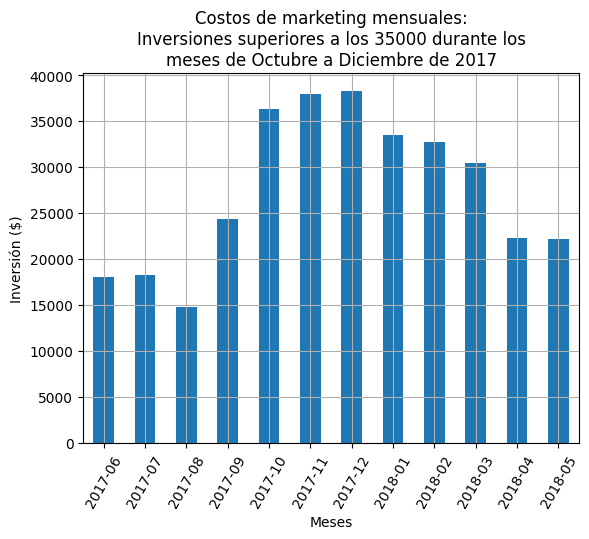

In [ ]:
#Generamos un gráfico de barras
mark_cost_month.plot(xlabel='Meses', ylabel='Inversión ($)', grid=True, kind='bar', rot=60,
                                title='Costos de marketing mensuales:\nInversiones superiores a los 35000 durante los\nmeses de Octubre a Diciembre de 2017')

A partir de los resultados obtenidos, podemos afirmar que durante el período de Octubre de 2017 a Marzo de 2018 se invirtieron más de $30000 mensual en marketing.

###### Fuentes de anuncios: Inversión mensual

Con la información disponible podemos calcular la inversión mensual para cada una de las fuentes de anuncios.

In [ ]:
#Extreamos el año de la inversión
mark_cost_cop['date_year']=mark_cost_cop['date'].dt.year
#Extreamos el mes de la inversión
mark_cost_cop['date_month_s']=mark_cost_cop['date'].dt.month
#Extraemos el año y el mes de la inversión
mark_cost_cop['date_month']=mark_cost_cop['date'].dt.to_period('M')
#Se usa el método '.pivot_table()' para agrupar la información por mes para cada fuente de anuncios
#Se calcula la inversión total en cada mes
cost_mon_source=mark_cost_cop.pivot_table(index=['date_year','date_month_s'], columns='source_id', values='costs', aggfunc='sum')
#Se muestra la inversión mensual en cada fuente de anuncios
cost_mon_source

source_id                    1        2         3        4        5       9   \
date_year date_month_s                                                         
2017      6             1125.61  2427.38   7731.65  3514.80  2616.12  285.22   
          7             1072.88  2333.11   7674.37  3529.73  2998.14  302.54   
          8              951.81  1811.05   6143.54  3217.36  2185.28  248.93   
          9             1502.01  2985.66   9963.55  5192.26  3849.14  415.62   
          10            2315.75  4845.00  15737.24  6420.84  5767.40  609.41   
          11            2445.16  5247.68  17025.34  5388.82  6325.34  683.18   
          12            2341.20  4897.80  16219.52  7680.47  5872.52  657.98   
2018      1             2186.18  4157.74  14808.78  5832.79  5371.52  547.16   
          2             2204.48  4474.34  14228.56  5711.96  5071.31  551.50   
          3             1893.09  3943.14  13080.85  5961.87  4529.62  480.29   
          4             1327.49  2993.70   9296.81  4408.49  3501.15  373.49   
          5             1467.61  2689.44   9411.42  4214.21  3669.56  362.17   

source_id                   10  
date_year date_month_s          
2017      6             314.22  
          7             329.82  
          8             232.57  
          9             460.67  
          10            627.24  
          11            792.36  
          12            645.86  
2018      1             614.35  
          2             480.88  
          3             526.41  
          4             388.25  
          5             409.86

Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': 'Costos mensuales de marketing para cada fuente de anuncios:\nLa fuente #3 recibió la mayor inversión en todos los meses'}, xlabel='Meses', ylabel='Inversión ($)'>

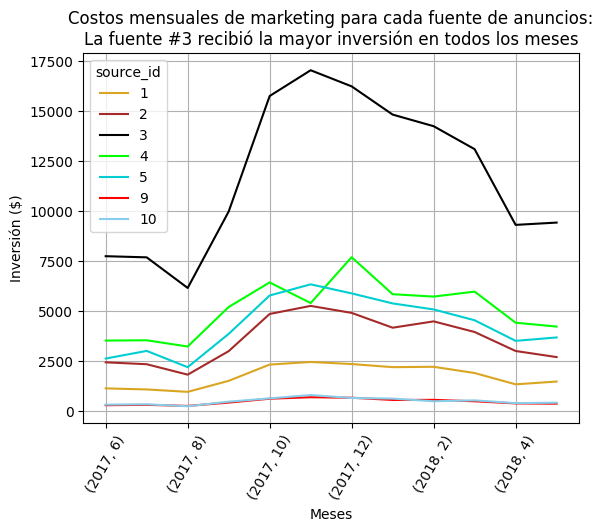

In [ ]:
#Se genera una gráfica
cost_mon_source.plot(xlabel='Meses', ylabel='Inversión ($)', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','red','skyblue'],
                    title="Costos mensuales de marketing para cada fuente de anuncios:\nLa fuente #3 recibió la mayor inversión en todos los meses")

Nuevamente podemos observar que la inversión en la fuente de anuncios #3 fue significativamente superior a cualquier otra inversión realizada en una fuente de anuncios durante el período analizado.

#### Costos de adquisición de cliente

Ahora vamos a calcular el costo de adquisición de cliente para cada una de las cohortes mensuales. Cabe recordar que las cohortes corresponden a los meses en los que los usuarios realizaron sus primeras compras.

In [ ]:
#Mediante el método '.merge()' juntamos los dataframes
ord_cost_mgd=coh_buyer_mgd.merge(mark_cost_month, left_on='first_buy_month', right_on='date_month')
#Calculamos el 'cac'
ord_cost_mgd['cac']=ord_cost_mgd['costs']/ord_cost_mgd['n_buyers']
#Mediante el método '.groupby()' agrupamos la información para mes de la primera compra
#Calculamos el 'cac'
cac_coh_lft=ord_cost_mgd.groupby('first_buy_month')['cac'].mean()
#Se muestra el dataframa obtenido
cac_coh_lft

,cac
first_buy_month,
2017-06,8.905091
2017-07,9.485486
2017-08,10.796015
2017-09,9.441654
2017-10,8.369327
2017-11,9.288870
2017-12,8.741809
2018-01,9.937302
2018-02,8.962758


Para una mejor visualización de los resultados generamos una gráfica.

<Axes: title={'center': 'Costo de adquisición de cliente en cada cohorte:\nEl cohorte de Agosto-2017 tuvo el mayor\ncosto de adquisición de clientes'}, xlabel='Cohorte mensual', ylabel='Costo de adquisición de clientes ($)'>

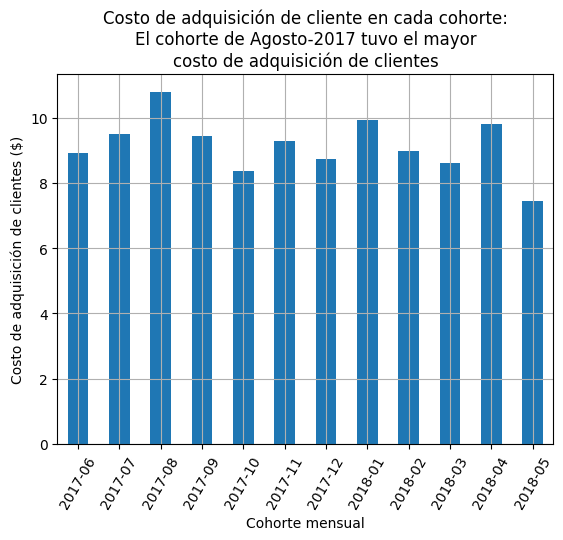

In [ ]:
#Se genera un gráfico de barras
cac_coh_lft.plot(xlabel='Cohorte mensual', ylabel='Costo de adquisición de clientes ($)', kind='bar', grid=True, rot=60,
             title='Costo de adquisición de cliente en cada cohorte:\nEl cohorte de Agosto-2017 tuvo el mayor\ncosto de adquisición de clientes')

A partir de los resultados obtenidos podemos afirmar que el costo de adquisición de clientes mensual oscila entre \$8 y \$10. Las excepciones son el cohorte mensual de Agosto de 2017 donde se supera el valor de \$10, y el mes de Mayo de 2018 donde no se alcanza el valor de \$8.

##### CAC: Fuentes de anuncios

Con la información disponible podemos calcular el costo de adquisición de cliente para cada fuente de anuncios.

In [ ]:
#Mediante el método '.groupby()' agrupamos la información para mes de compra y fuente de anuncios
#Calculamos la inversión y restablecemos el index por defecto
source_cost_monthly=mark_cost_cop.groupby(['date_month', 'source_id'])['costs'].sum().reset_index()
#Renombramos la columna
source_cost_monthly.rename(columns={'date_month':'first_buy_month'}, inplace=True)
#Definimos las dos columnas como el nuevo índice
source_cost_monthly=source_cost_monthly.set_index(['first_buy_month', 'source_id'])
#Mediante el método '.join()' agregamos la serie al dataframe
source_cost_ord=source_ord_coh.join(source_cost_monthly, how='left')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
source_cost_ord.fillna(0, inplace=True)
#Calculamos el 'cac'
source_cost_ord['cac']=source_cost_ord['costs']/source_cost_ord['n_buyers']
#Restablecemos el index por defecto
source_cost_ord=source_cost_ord.reset_index()
#Extraemos el mes de la primera compra
source_cost_ord['fb_month']=source_cost_ord['first_buy_month'].dt.month
#Extraemos el año de la primera compra
source_cost_ord['fb_year']=source_cost_ord['first_buy_month'].dt.year
#Se genera una tabla dinámica
cac_source_pv=source_cost_ord.pivot_table(index=['fb_year','fb_month'], columns='source_id', values='cac', aggfunc='mean')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
cac_source_pv.fillna(0, inplace=True)
#Se muestra la tabla dinámica
cac_source_pv

source_id               1          2          3          4          5    7   \
fb_year fb_month                                                              
2017    6         3.894844   8.700287  13.376557   8.721588   6.412059  0.0   
        7         4.094962  10.801435  18.672433   8.114322   7.241884  0.0   
        8         5.665536  13.219343  21.480909  10.688904   6.871950  0.0   
        9         4.404721  10.189966  17.887882  10.468266   6.729266  0.0   
        10        4.650100  10.695364  17.742097   6.472621   6.401110  0.0   
        11        4.648593  11.766099  19.614447   5.544053  10.268409  0.0   
        12        4.249002  11.830435  17.477931   6.969574   8.830857  0.0   
2018    1         5.783545  14.955899  20.682654   7.200975   9.229416  0.0   
        2         5.847427  14.669967  18.359432   6.873598   8.566402  0.0   
        3         4.968740  12.438927  19.611469   7.489786   8.727592  0.0   
        4         5.205843  15.043719  24.659973   8.729683   9.093896  0.0   
        5         4.734226   7.554607  17.624382   7.511961   7.692998  0.0   
        6         0.000000   0.000000   0.000000   0.000000   0.000000  0.0   

source_id                9          10  
fb_year fb_month                        
2017    6          4.675738   3.530562  
        7          5.932157   7.670233  
        8          4.526000   5.963333  
        9          6.394154   6.676377  
        10         5.916602   3.523820  
        11         7.043093   7.692816  
        12         8.224750  10.251746  
2018    1         10.323774   7.776582  
        2         10.212963   4.411743  
        3          4.488692   3.987955  
        4         28.730000   4.411932  
        5         11.682903   4.360213  
        6          0.000000   0.000000

Para una mejor visualización de los resultados generamos una gráfica.

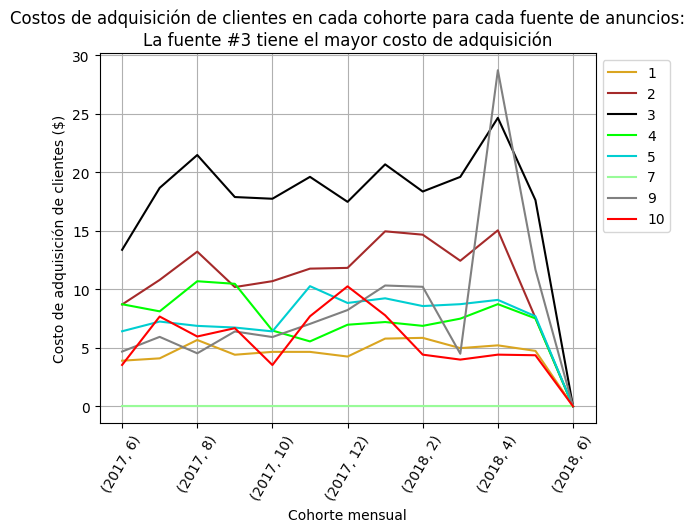

In [ ]:
cac_source_pv.plot(xlabel='Cohorte mensual', ylabel='Costo de adquisición de clientes ($)', grid=True, rot=60,
                    color=['goldenrod','brown','black','lime','darkturquoise','palegreen','gray','red','skyblue'],
                    title="Costos de adquisición de clientes en cada cohorte para cada fuente de anuncios:\nLa fuente #3 tiene el mayor costo de adquisición")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

A partir de los resultados obtenidos, en la mayoría de los cohortes la fuente de anuncios #3 tiene el mayor costo de adquisición de clientes. Solo al final del período analizado es superado por la fuente de anuncios #9 en la cohorte de Abril de 2018.

#### Retorno de la inversión en marketing (ROMI)

Con la información disponible podemos calcular el retorno de la inversión en marketing.

In [ ]:
#Se calcula el 'romi'
ord_cost_mgd['romi']=ord_cost_mgd['ltv']/ord_cost_mgd['cac']
#Se genera una tabla dinámica
ord_cost_rpv=ord_cost_mgd.pivot_table(index='first_buy_month', columns='lf_time', values='romi', aggfunc='mean')
#Usando el método '.cumsum()' calculamos el 'romi' acumulado para cada cohorte
ord_cost_rpvc=ord_cost_rpv.cumsum(axis=1).round(2)
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
ord_cost_rpvc.fillna(0, inplace=True)
#Se muestra la tabla dinámica
ord_cost_rpvc

lf_time,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,0.00
2017-08,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,0.00,0.00
2017-09,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,0.00,0.00,0.00
2017-10,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,0.00,0.00,0.00,0.00
2017-11,0.28,0.30,0.31,0.33,0.34,0.34,0.34,0.00,0.00,0.00,0.00,0.00
2017-12,0.27,0.29,0.34,0.40,0.42,0.44,0.00,0.00,0.00,0.00,0.00,0.00
2018-01,0.21,0.22,0.24,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2018-02,0.23,0.25,0.25,0.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Para una mejor visualización de los resultados generamos un mapa de calor.

Text(0.5, 1.0, 'Retorno de la inversión en marketing:\nLa cohorte de Septiembre-2017 tiene el mayor ROMI acumulado')

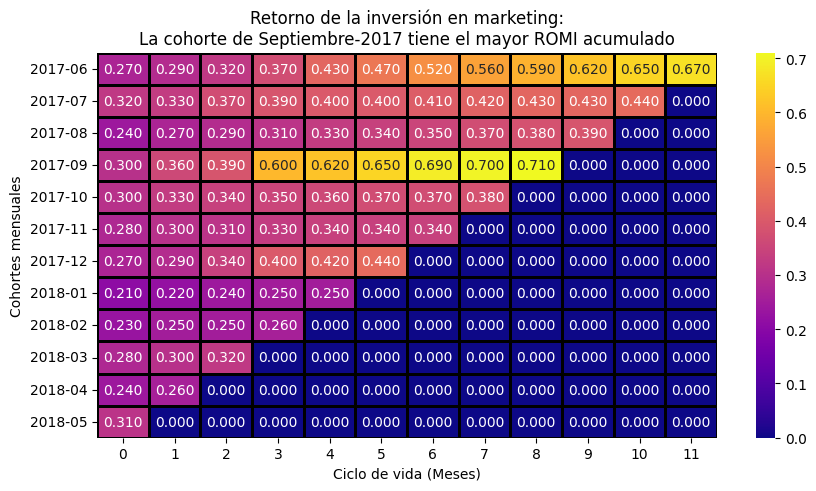

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(10, 5))
romi_map=sns.heatmap(
    ord_cost_rpvc,
    cmap='plasma',
    annot=True,
    fmt='.3f',
    linewidths=1,
    linecolor='black'
)
#Se define la etiqueta del eje x
romi_map.set_xlabel('Ciclo de vida (Meses)')
#Se define la etiqueta del eje x
romi_map.set_ylabel('Cohortes mensuales')
#Se define el título del gráfico
romi_map.set_title("Retorno de la inversión en marketing:\nLa cohorte de Septiembre-2017 tiene el mayor ROMI acumulado")

A partir de los resultados obtenidos, podemos afirmar que en solo dos cohortes se compensó el 50% del valor invertido. La cohorte con el mayor 'ROMI' acumulado fue la cohorte de Septiembre de 2017, que en el 4to mes recuperó el 60% de la inversión. Luego le sigue la cohorte de Junio de 2017, que en el 7mo mes recupera el 52% de la inversión. Ninguna de las otras cohortes alcanza a recuperar al menos el 50% de la inversión.

Ahora calculamos el 'ROMI' acumulado promedio para cada uno de los meses del ciclo de vida.

In [ ]:
#Usando el método '.cumsum()' calculamos el 'romi' acumulado promedio para los meses del ciclo de vida
ord_cost_rpv.cumsum(axis=1).mean(axis=0)

,0
lf_time,
0,0.270408
1,0.290992
2,0.315535
3,0.359870
4,0.391473
5,0.429938
6,0.448410
7,0.484976
8,0.526936


Teniendo en cuenta el resultado anterior, en promedio las cohortes compensan el 52% de la inversión en el 9no mes. Lastimosamente, en el período analizado solo se alcanza a compensar el 66% de la inversión y por lo tanto no se genera ningún beneficio.

###### Fuentes de anuncios: ROMI

Con la información disponible podemos calcular el retorno en la inversión en marketing para cada fuente de anuncios.

In [ ]:
#Se excluyen los registros de la fuente de anuncios #7
source_cost_nss=source_cost_ord[source_cost_ord['source_id']!=7]
#Mediante el método '.groupby()' agrupamos la información por mes de primera compra, ciclo de vida
#y fuente de anuncios. Calculamos el 'ltv'
source_gb_ltv=source_cost_nss.groupby(['first_buy_month','source_id','lf_time'])['ltv'].mean()
#Se restablece el index por defecto
source_gb_ltv=source_gb_ltv.reset_index()
#Mediante el método '.groupby()' agrupamos la información por ciclo de vida y fuente de anuncios.
#Calculamos el 'ltv'
source_lf_ltv=source_gb_ltv.groupby(['lf_time','source_id'])['ltv'].mean()
#Mediante el método '.groupby()' agrupamos la información por mes de primera compra, ciclo de vida
#y fuente de anuncios. Calculamos el 'cac'
source_gb_cac=source_cost_nss.groupby(['first_buy_month','source_id','lf_time'])['cac'].mean()
#Se restablece el index por defecto
source_gb_cac=source_gb_cac.reset_index()
#Mediante el método '.groupby()' agrupamos la información por ciclo de vida y fuente de anuncios.
#Calculamos el 'cac'
source_lf_cac=source_gb_cac.groupby(['lf_time','source_id'])['cac'].mean()
#Mediante el método '.concat()' juntamos los dataframes
source_lf_romi=pd.concat([source_lf_ltv, source_lf_cac], axis='columns')
#Se calcula el 'romi'
source_lf_romi['romi']=source_lf_romi['ltv']/source_lf_romi['cac']
#Se genera una tabla dinámica
source_lf_romi_pv=source_lf_romi.pivot_table(index='lf_time', columns='source_id', values='romi', aggfunc='mean')
#Con el método '.fillna()' se reemplazan los valores ausentes con ceros
source_lf_romi_pv.fillna(0, inplace=True)
#Usando el método '.cumsum()' se calcula el 'romi' acumulado para cada fuente de anuncios para los meses del ciclo de vida
source_lf_romi_cs=source_lf_romi_pv.cumsum(axis=0).round(3)
#Se muestra la tabla dinámica
source_lf_romi_cs

source_id,1,2,3,4,5,9,10
lf_time,,,,,,,
0,0.485,0.211,0.100,0.268,0.268,0.171,0.241
1,0.550,0.242,0.102,0.274,0.279,0.182,0.250
2,0.591,0.272,0.104,0.278,0.289,0.193,0.254
3,0.619,0.367,0.106,0.283,0.315,0.205,0.255
4,0.651,0.383,0.107,0.287,0.326,0.212,0.257
5,0.677,0.399,0.108,0.292,0.336,0.219,0.259
6,0.744,0.416,0.109,0.296,0.343,0.228,0.260
7,0.774,0.435,0.110,0.298,0.355,0.248,0.265
8,0.823,0.442,0.112,0.301,0.364,0.276,0.270


Para una mejor visualización de los resultados generamos un mapa de calor.

Text(0.5, 1.0, "Retorno en la inversión de marketing para cada fuente de anuncios:\nLa fuente #1 tiene el mayor 'ROMI' acumulado")

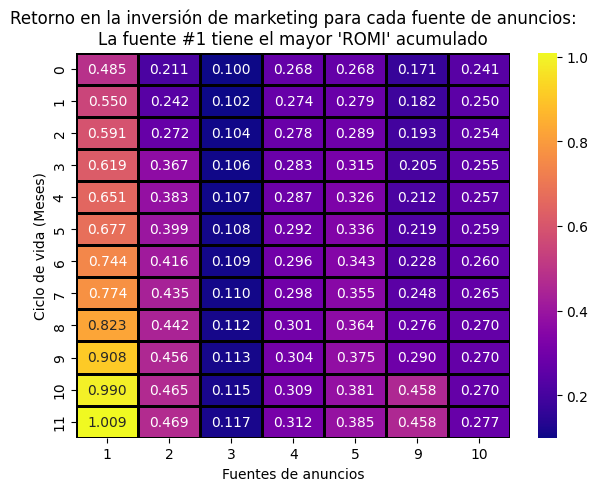

In [ ]:
#Se genera un mapa de calor de la tabla dinámica
plt.figure(figsize=(7, 5))
romi_map=sns.heatmap(
    source_lf_romi_cs,
    cmap='plasma',
    annot=True,
    fmt='.3f',
    linewidths=1,
    linecolor='black'
)
#Se define la etiqueta del eje x
romi_map.set_xlabel('Fuentes de anuncios')
#Se define la etiqueta del eje y
romi_map.set_ylabel('Ciclo de vida (Meses)')
#Se define el título del gráfico
romi_map.set_title("Retorno en la inversión de marketing para cada fuente de anuncios:\nLa fuente #1 tiene el mayor 'ROMI' acumulado")

Teniendo en cuenta el resultado anterior, podemos decir que la mejor fuente de anuncios en términos de 'ROMI' acumulado es la fuente de anuncios #1. Es la única fuente que logra compensar la inversión al final del ciclo de vida. Otras fuentes de anuncios que se acercan al 50% son la fuente de anuncios #2 y #9. La peor fuente de anuncios en términos de 'ROMI' acumulado es la fuente de anuncios #3, que no llega ni al 15%.

## Conclusiones

* A partir de los análisis de visitas e inicios de sesión podemos notar que existe una temporada comprendida entre los meses de Octubre de 2017 y Marzo de 2018 donde se presentan una actividad constante por parte de los usuarios. Esto indicaría que durante estos meses es la temporada con mayor cantidad de eventos. El pico de actividad se alcanza a finales del mes de Noviembre, lo que podría estar relacionado con eventos de Navidad y final de año. El dispostivo 'desktop' es el preferido por los usarios. Las fuentes de anuncios #3, #4 y #5 tienen mayor efecto en la actividad de los usuarios.

* En general las sesiones de los usuarios duran un minuto independientemente del dispositivo o la fuente de anuncio. Los factores de adherencia siguen la tendencia general, pero podemos ver unos números ligeramente más favorables para las fuentes de anuncios #1 y #2.

* A partir del análisis de los tiempos de conversión notamos que la mayoría de los usuarios realizan su primera compra el mismo día que se registran. El período con mayores conversiones está comprendido entre los meses de Octubre de 2017 a Marzo de 2018, en correspondencia con la actividad de los usuarios. Igualmente, el dispositivo 'desktop' tiene la mayor conversión así como las fuentes de anuncios #3, #4 y #5, también en correspondencia con la actividad de los usuarios. Detrás de las fuentes de anuncios principales, las fuentes #1 y #2 también tienen buenos números de conversión.

* Para el número de pedidos, podemos ver que se sigue la tendencia apreciada en los tiempos de conversión. Respecto al tamaño de compra, no hay ningún mes o dispositivo destacable, dado que los valores se encuentran en los mismos rangos para todos los casos. Respecto, a las fuentes de anuncios, destacan las fuentes #1 y #2.

* Respecto al *LTV*, los mayores valores no coinciden con el período de mayor actividad de los usuarios (Octubre/2017-Marzo/2018). Tampoco hay diferencias significativas para los valores dependiendo del dispositivo. En cuanto a las fuentes de anuncios, destaca la fuente de anuncios #2 con dos picos a lo largo del ciclo de vida.

* En cuanto a la inversión de marketing, los meses de mayor inversión coinciden con el período de mayor actividad de los usuarios (Octubre/2017-Marzo/2018). Es posible apreciar, que una gran porción del presupuesto se invierte en la fuente de anuncios #3. En cuanto a los costos de adquisición, ninguna cohorte destaca en particular, pero las fuentes de anuncios #3 y #2 tienen los valores más altos respectivamente.

* En términos de rentabilidad, según el análisis por cohortes mensuales, se deben mejorar los números. En el período analizado, no se alcanza a recuperar la inversión, lo que indicaría que se están generando pérdidas. Con el análisis realizado por fuentes de anuncios podemos ver que el dinero invertido en la fuente #3 se traduce en usuarios e inicios de sesión, pero el costo resulta tan alto en comparación con los beneficios que no resulta rentable. Desde este punto de vista, la fuente de anuncios más rentable resulta ser la fuente #1. Luego de esta fuente destaca la #2 que no supera la #1 porque tiene un costo de adquisición de clientes alto, pero dada la magnitud de su *LTV* resulta siendo rentable. Y la tercera mejor fuente de anuncios sería la #9, que al final del período se acerca a una recuperación de la inversión del 46%.

* La conclusión respecto a los dispositivos, es que el dispostivo 'desktop' resulta superior al dispositivo 'touch' en muchas de las métricas por el volumen de usuarios. La idea en este caso, sería atraer más usuarios a usar el dispositivo 'touch'. En este caso se debería evaluar que tan amigable, cómoda o fácil de usar es la versión 'touch'.

* Finalmente, podríamos mejorar la rentabilidad general si elegimos mejor en que fuentes de anuncios invertir. Al principio del análisis pudimos notar que la fuente #3 destacaba en número de visitas, inicios de sesión, mayor conversión en el tiempo 0 días y mayor número de pedidos. Pero todo esto era reflejo de la cantidad de dinero invertida. En términos de rentabilidad, dado el alto costo de adquisición para esta fuente, la inversión no se traducía en beneficios. El mismo principio aplicaría para las fuentes #4 y #5 que también lucían prometedoras. En este punto, la oportunidad de mejora estaría en invertir en las fuentes de anuncios con mejor rentabilidad que son las fuentes #1 y #2. Estas fuentes no tienen números tan llamativos en otras métricas como la fuente #3, pero tienen números sólidos que pueden mejorar con la inversión adecuada y que al final se traducirían en la recuperación de  la inversión en menos tiempo e incluso en la generación de beneficios al final del período.